# Notebook 2b – Exploratory Data Analysis per city (EDA)

## 0. Load processed data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up environment
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define project root and data path
current_dir = Path().resolve()
root = current_dir.parents[1]  # From 'app/notebooks/' to 'GridSense/'

data_dir = root / 'data' / 'processed'

# Load merged dataset (Parquet only)
df = pd.read_parquet(data_dir / 'merged_openmeteo_pvgis.parquet')

print("✅ Merged dataset loaded. Shape:", df.shape)



✅ Merged dataset loaded. Shape: (7293312, 11)


## 1. Filter irradiance > 0

In [2]:
target = 'global_irradiance_W_m2'
df_nonzero = df[df[target] > 0]
print("✅ Filtered non-zero irradiance. Shape:", df_nonzero.shape)


✅ Filtered non-zero irradiance. Shape: (3512764, 11)


## 2. Histograms of irradiance per city (FacetGrid)

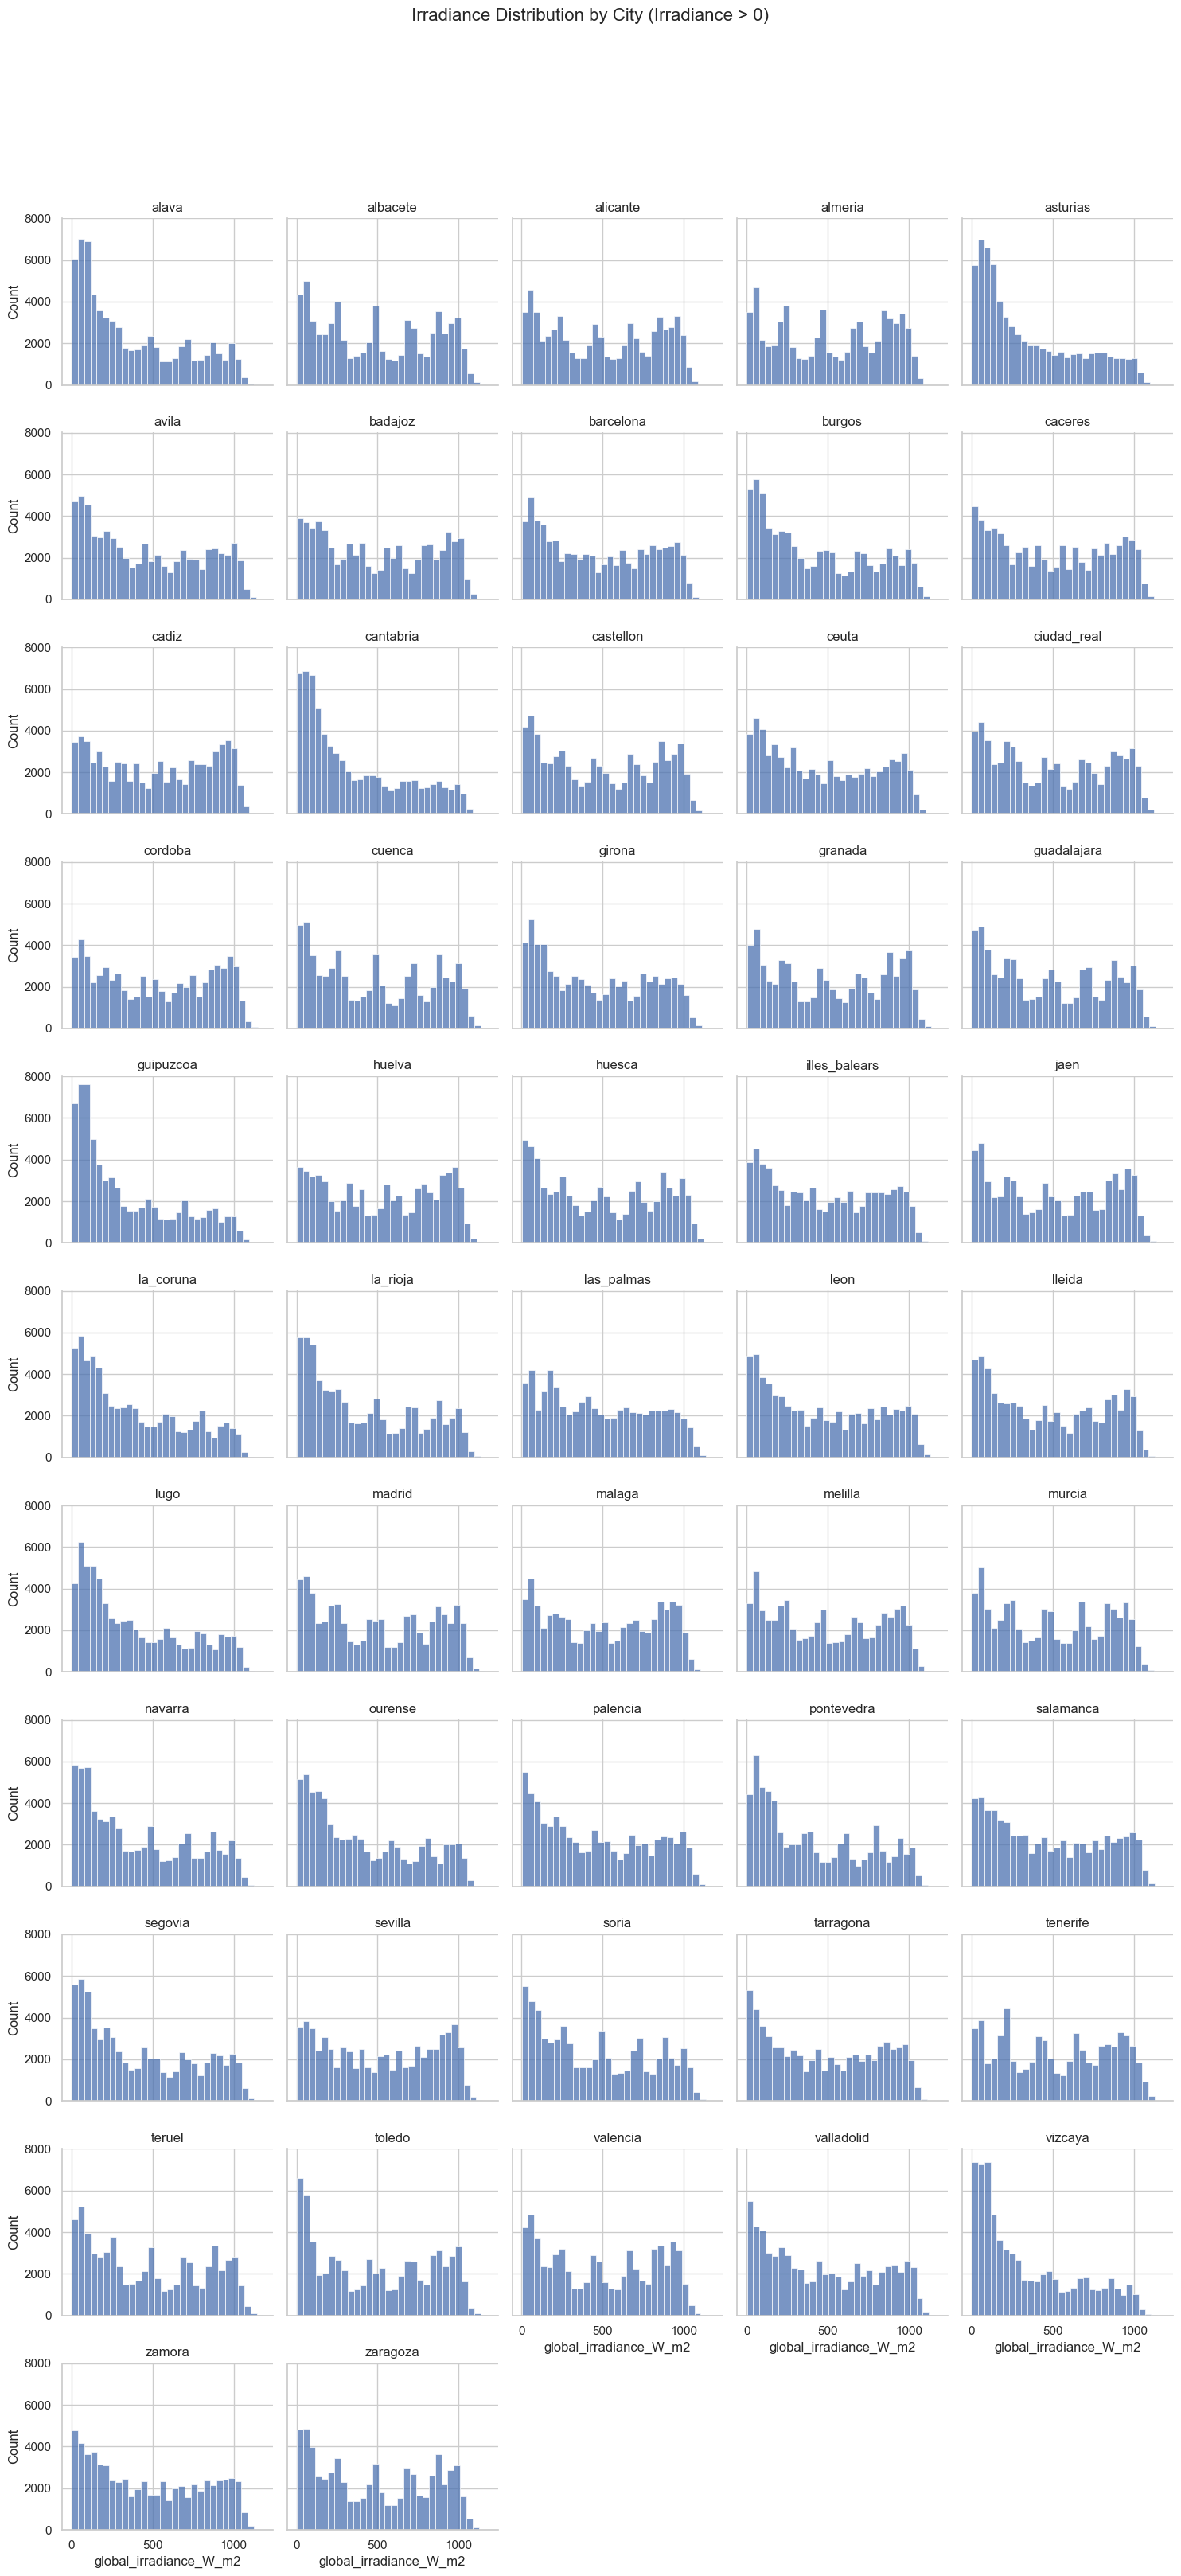

In [3]:
g = sns.FacetGrid(df_nonzero, col="city", col_wrap=5, sharex=True, sharey=True)
g.map(sns.histplot, target, bins=30)

for ax, title in zip(g.axes.flatten(), df_nonzero['city'].unique()):
    ax.set_title(title)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Irradiance Distribution by City (Irradiance > 0)", fontsize=16)
plt.show()


## 3. Boxplot of irradiance per city

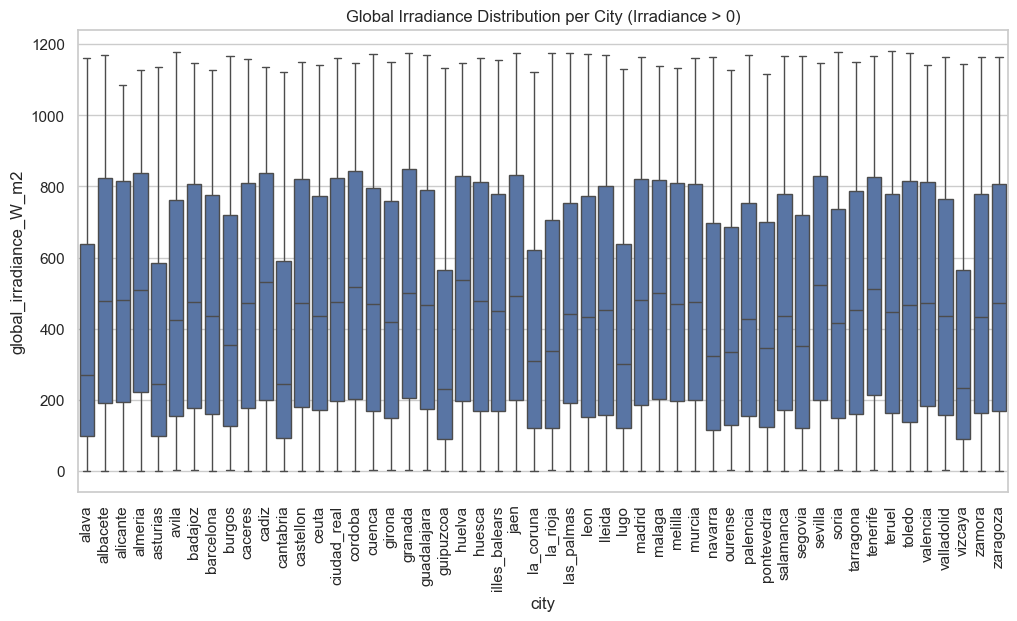

In [4]:
sns.boxplot(x='city', y=target, data=df_nonzero)
plt.xticks(rotation=90)
plt.title("Global Irradiance Distribution per City (Irradiance > 0)")
plt.show()


## 4. Correlation matrix per city

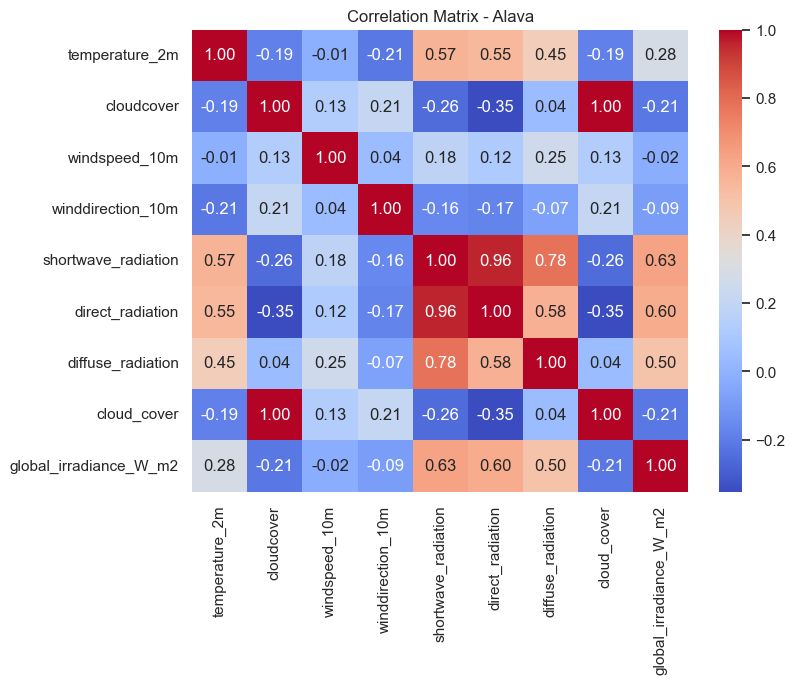

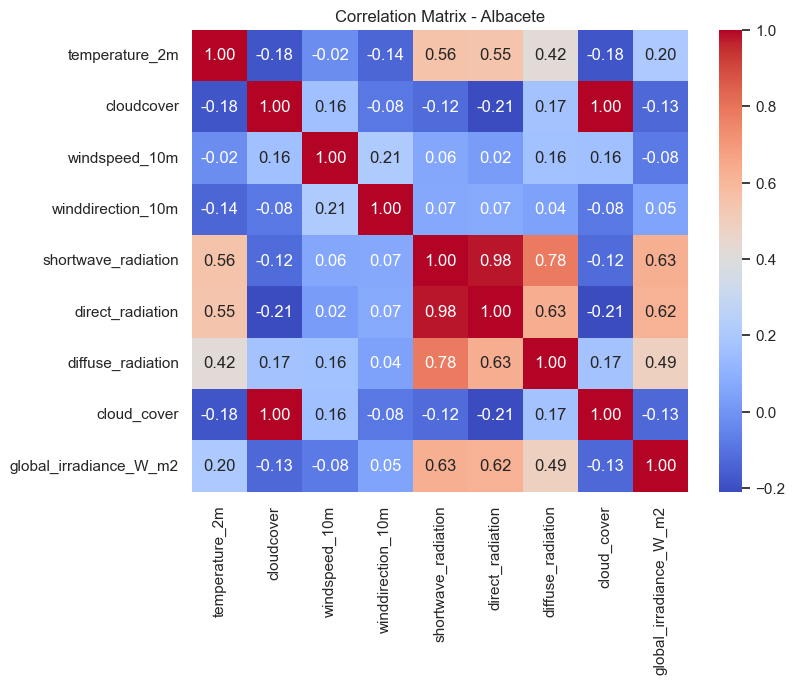

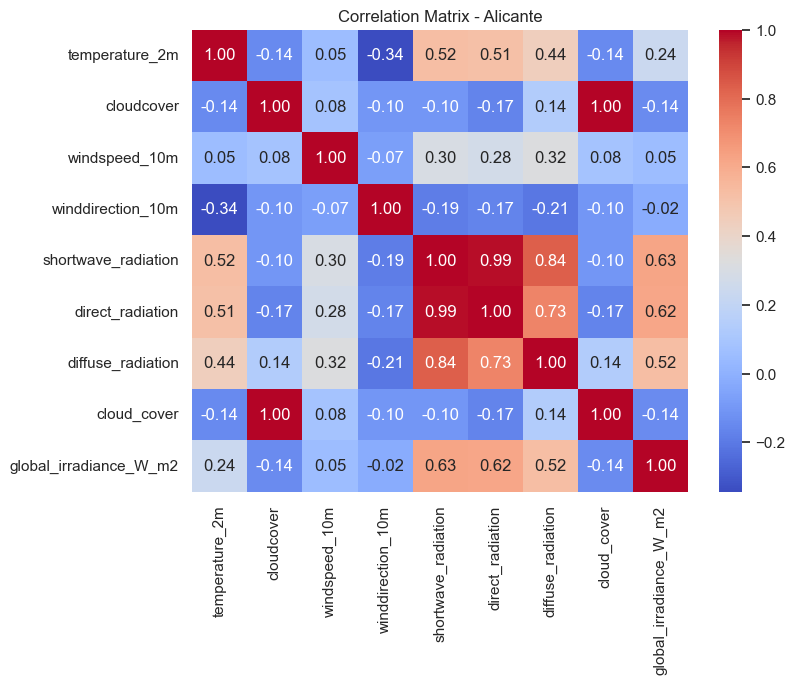

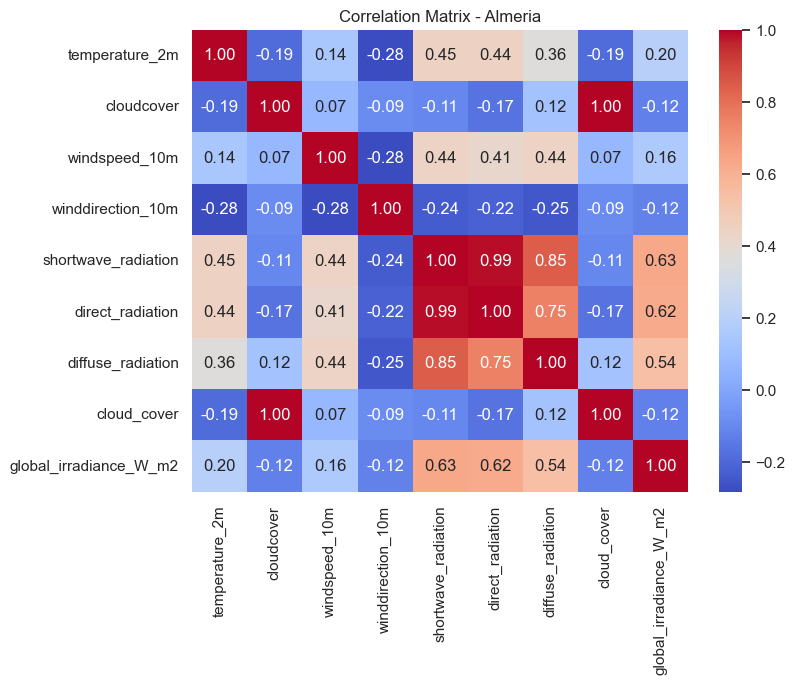

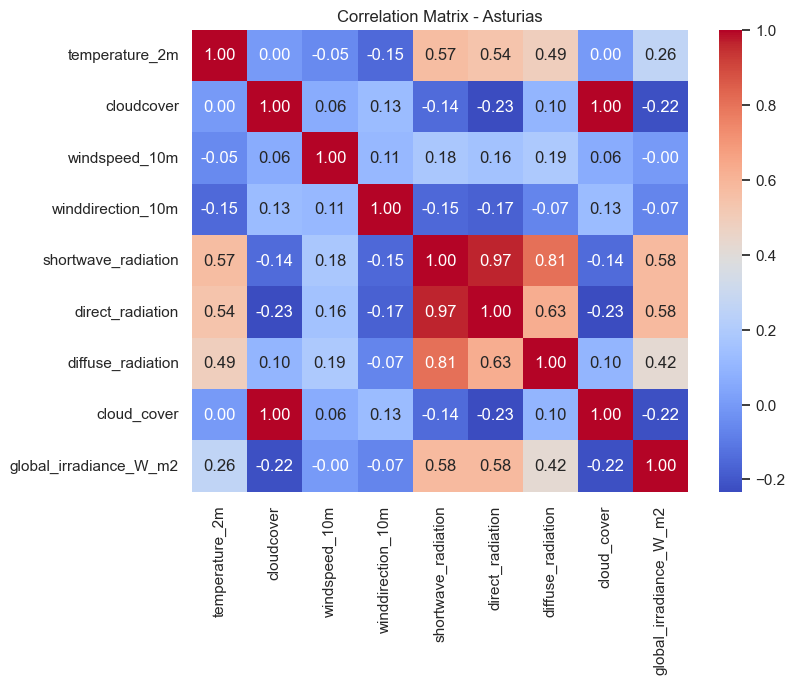

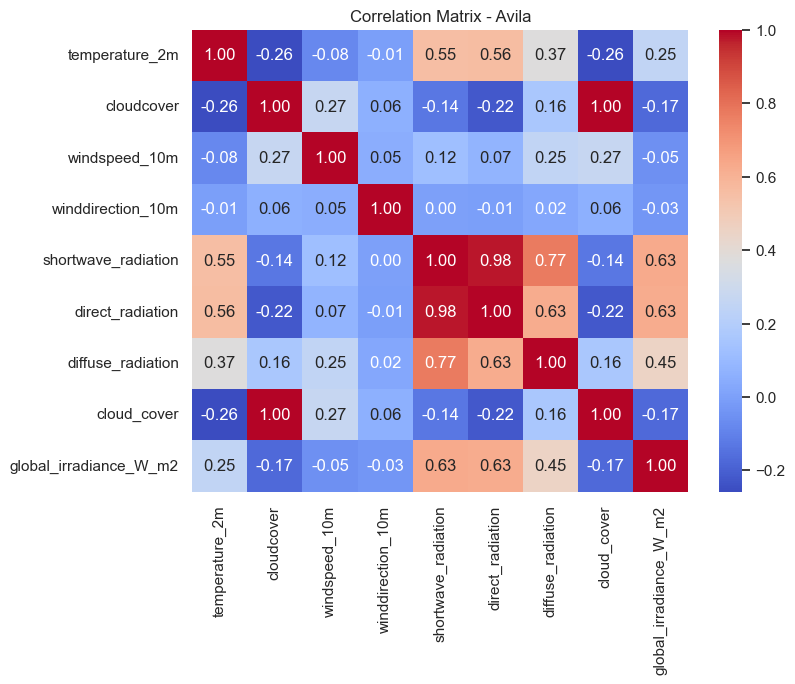

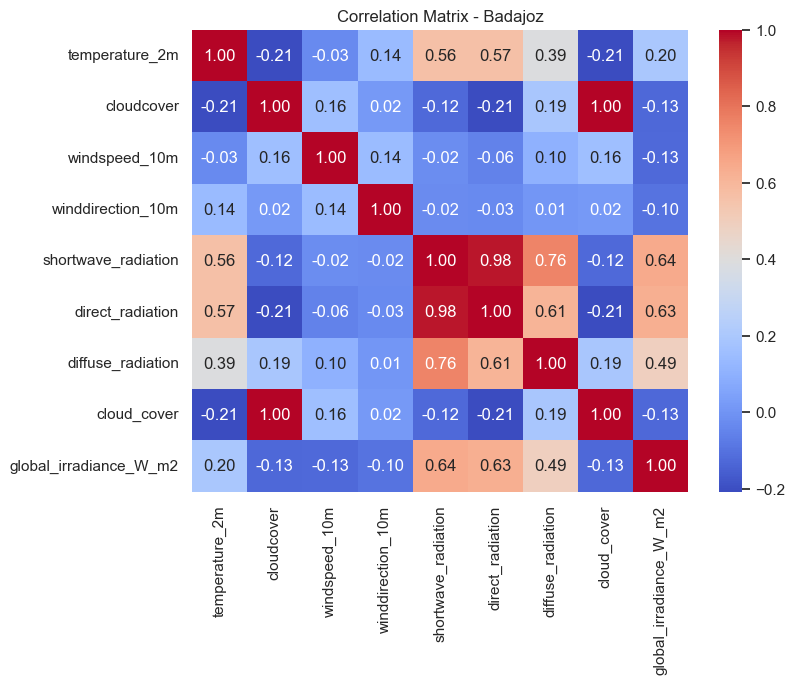

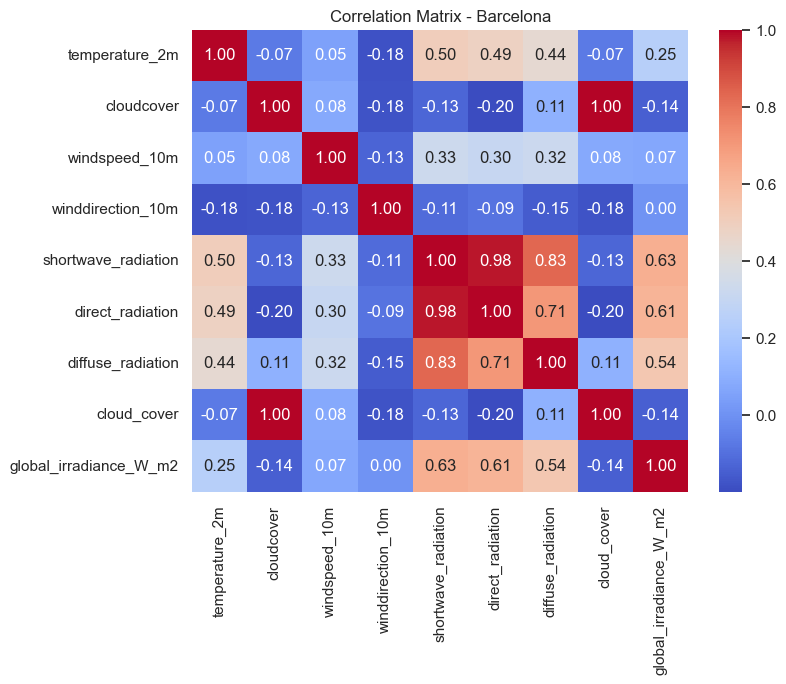

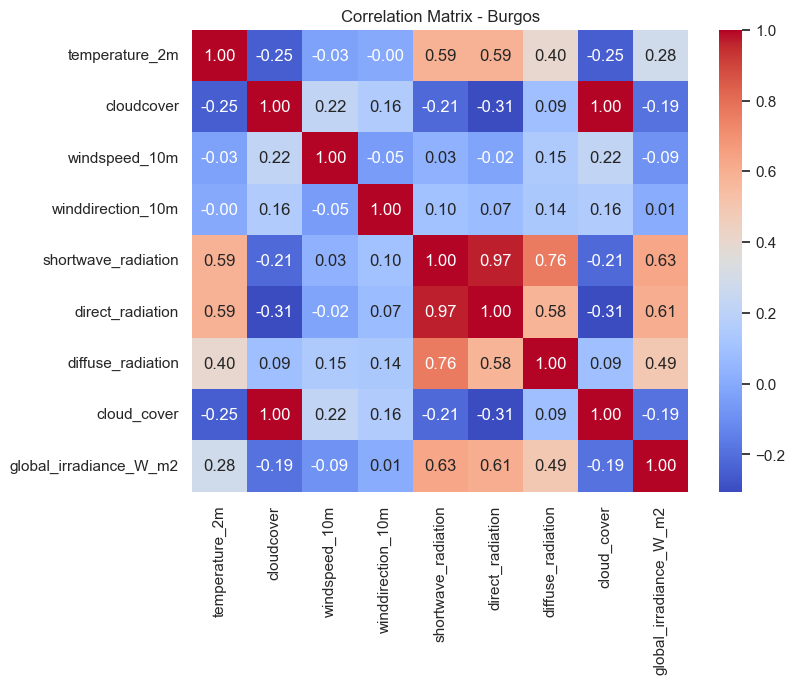

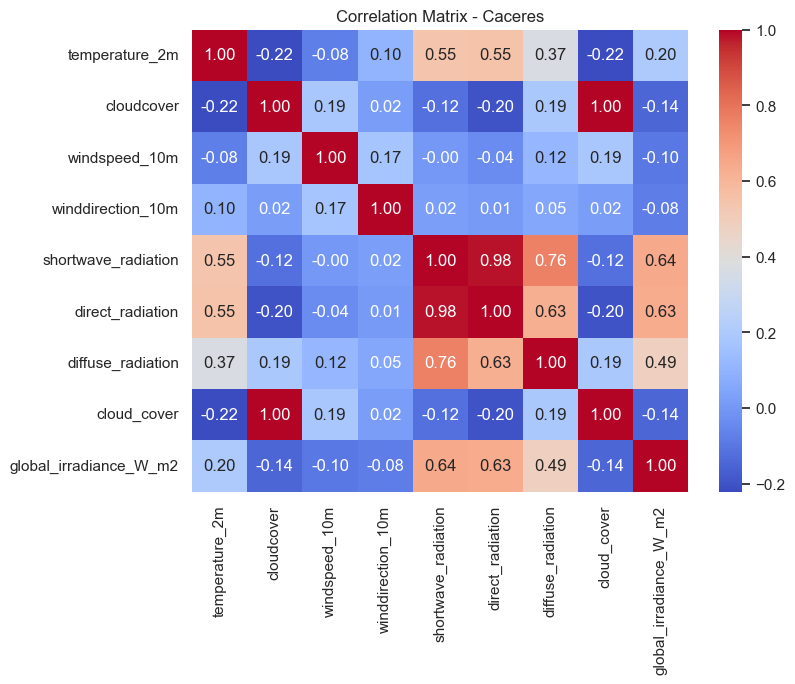

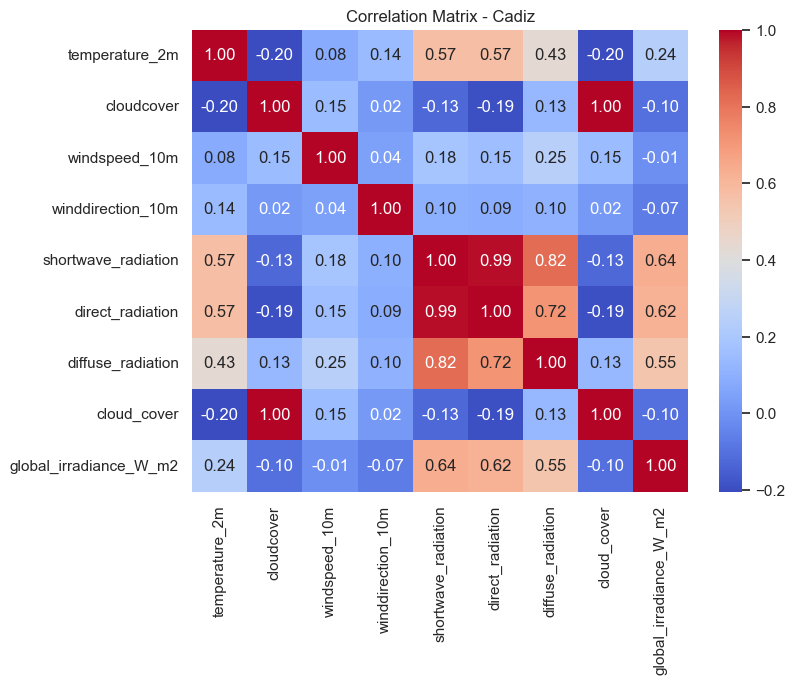

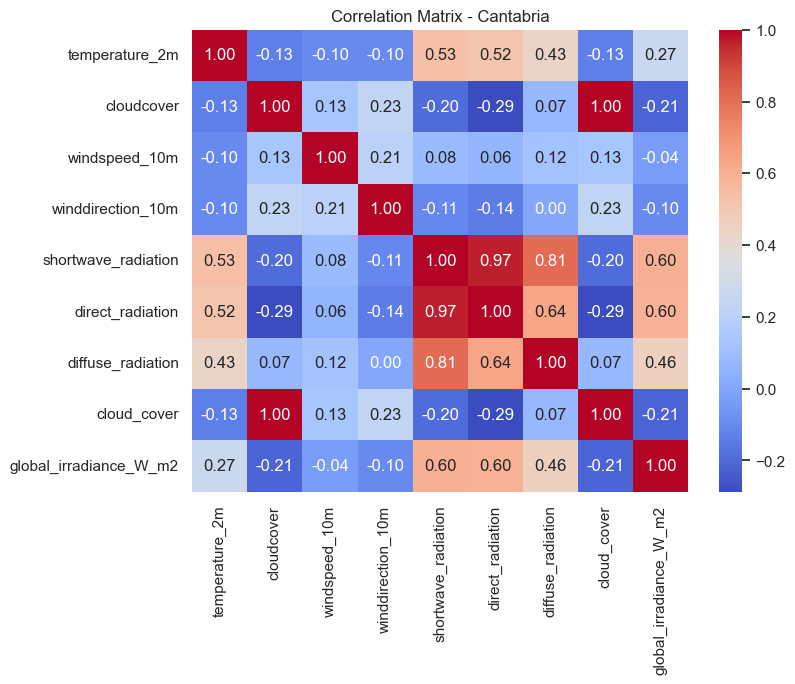

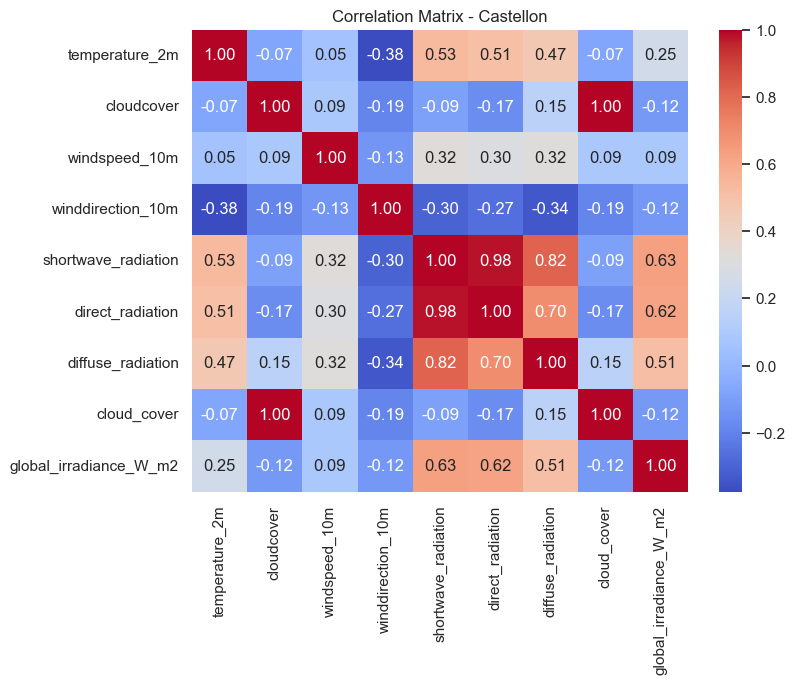

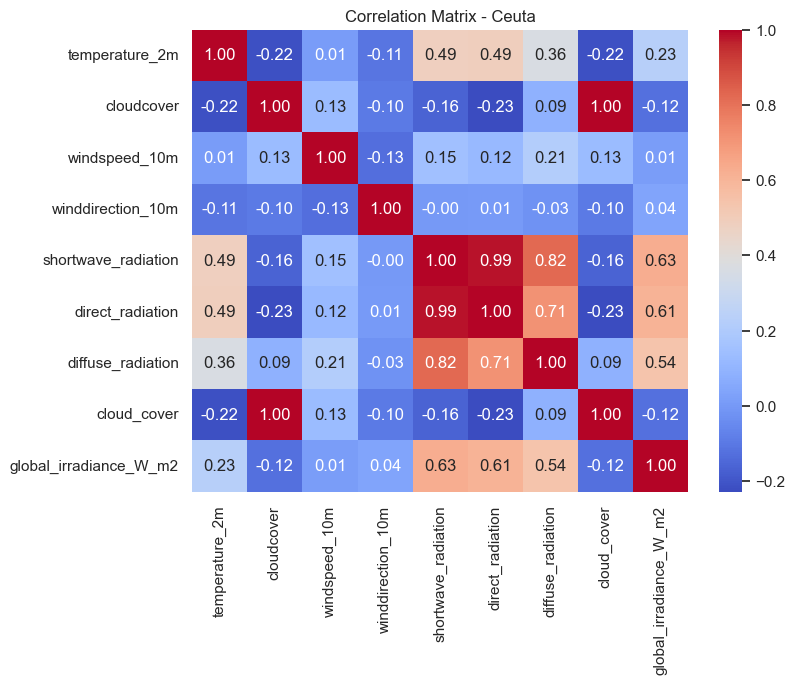

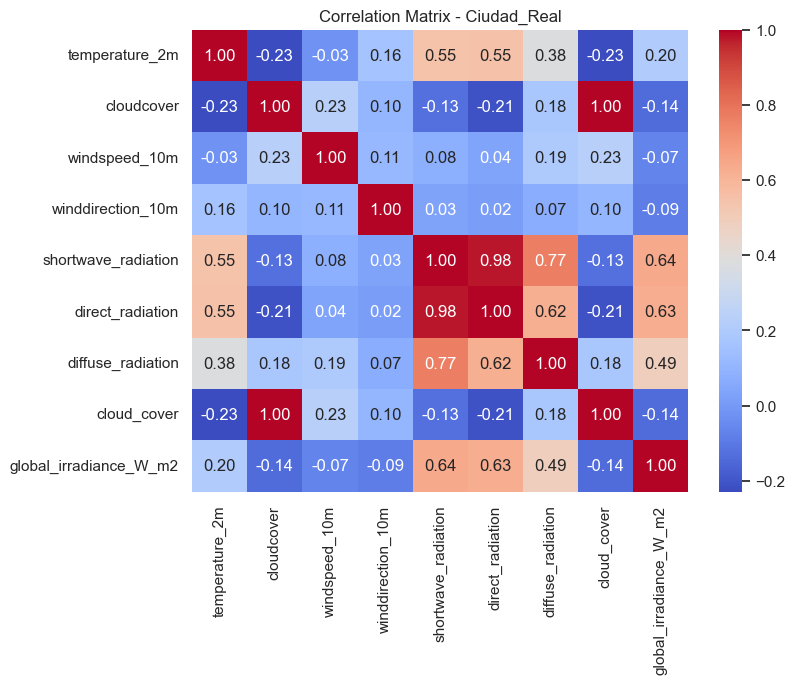

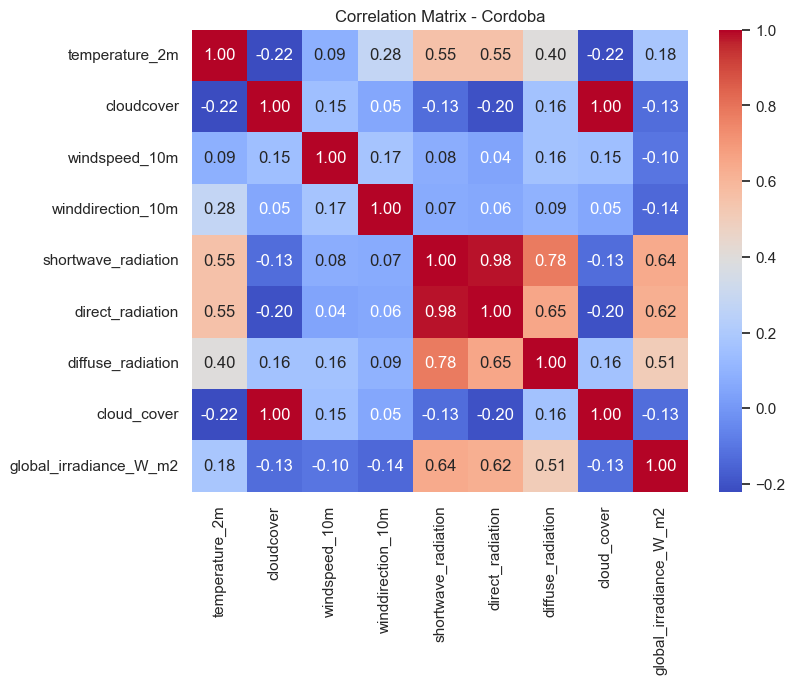

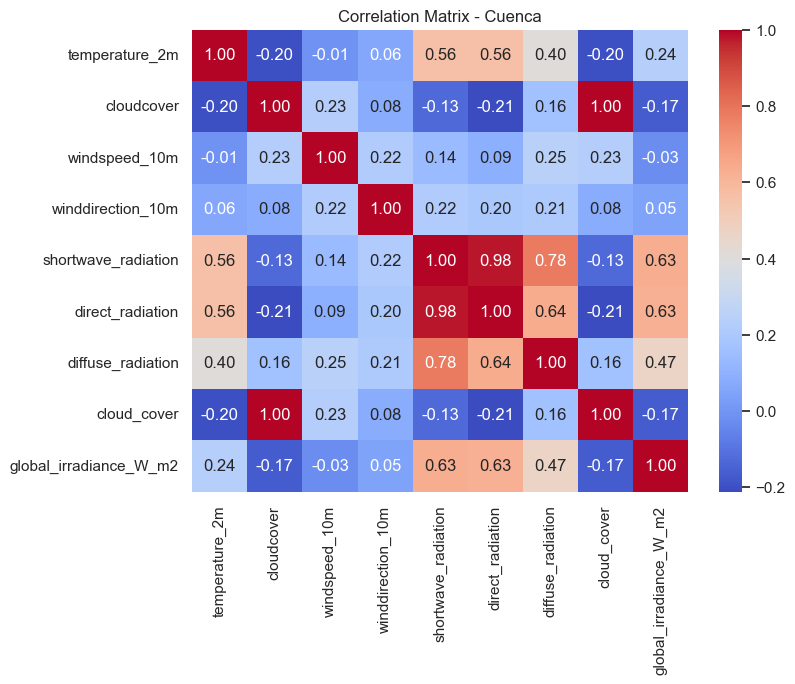

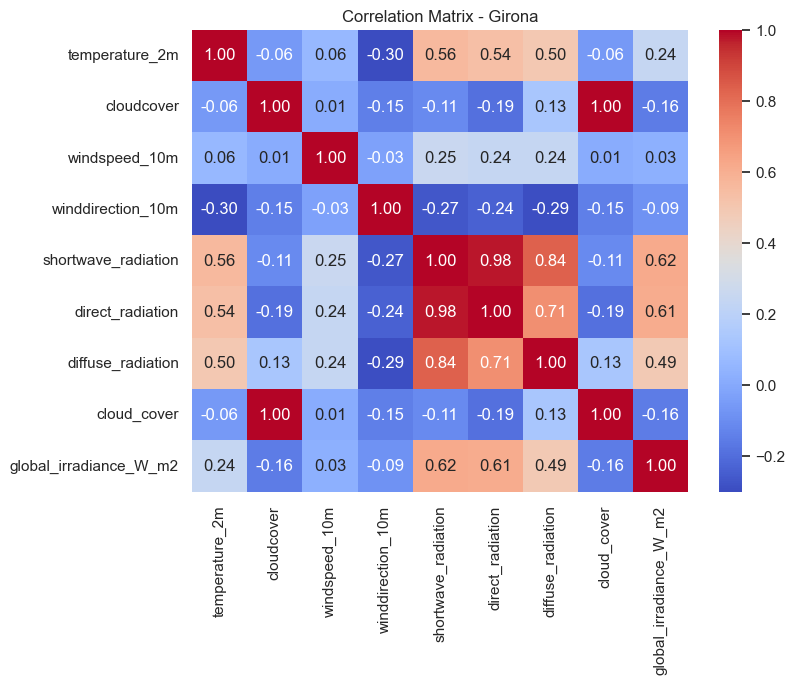

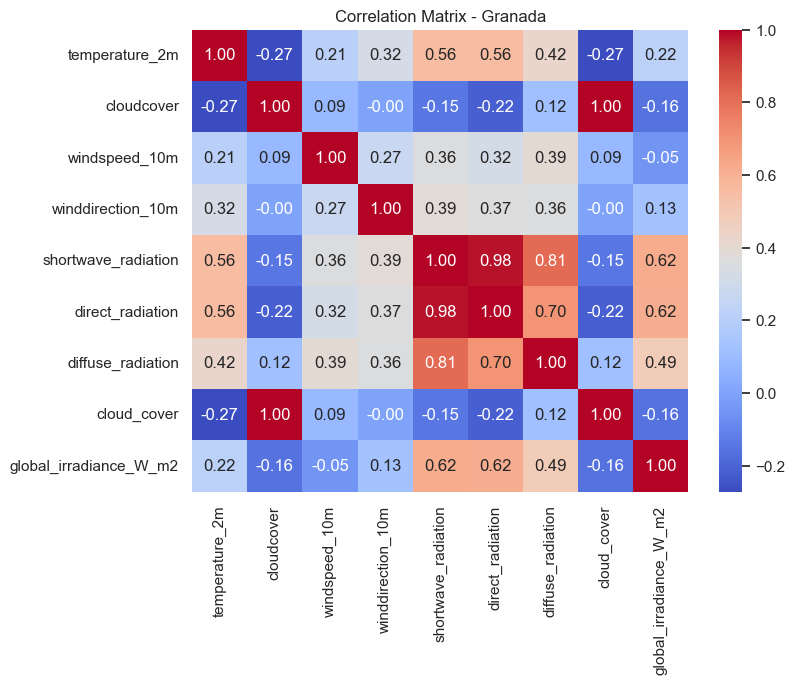

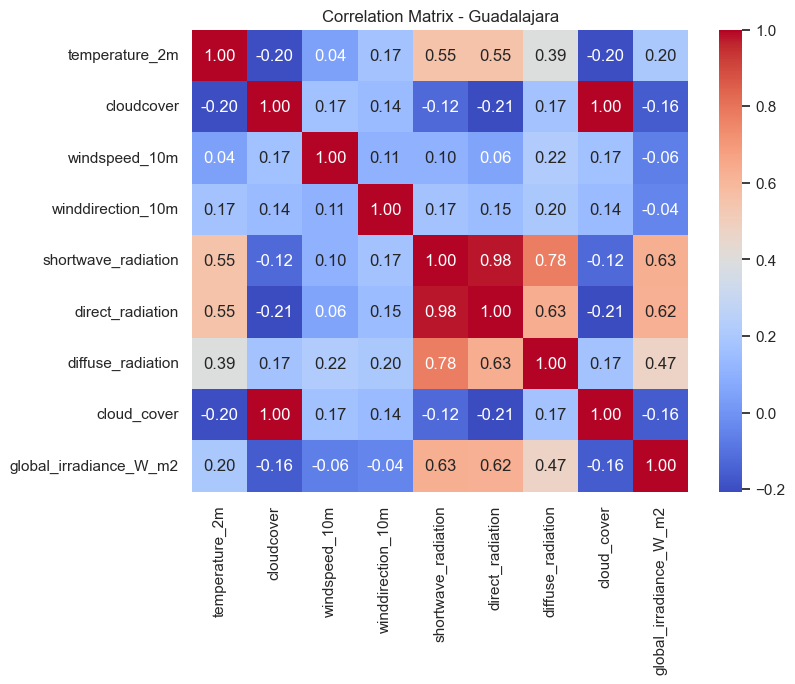

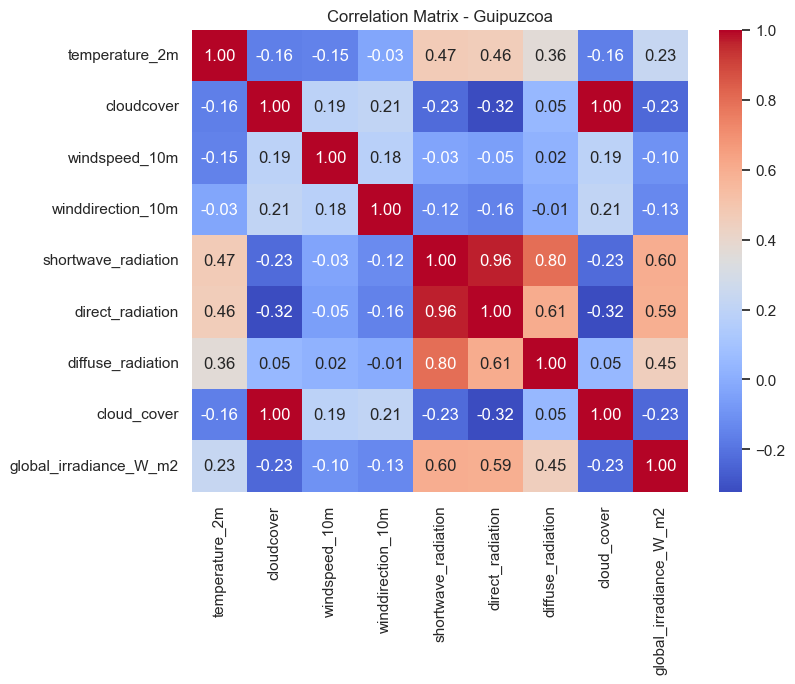

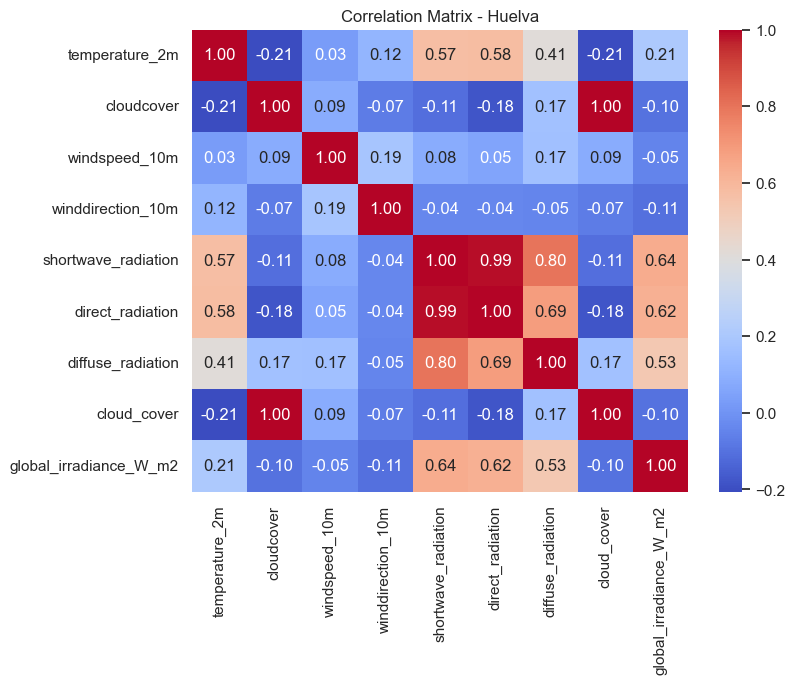

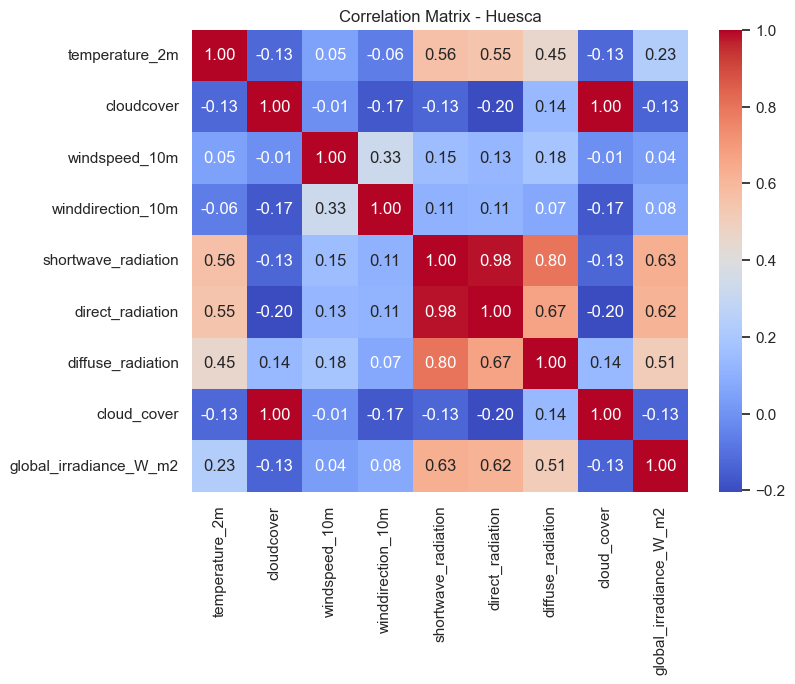

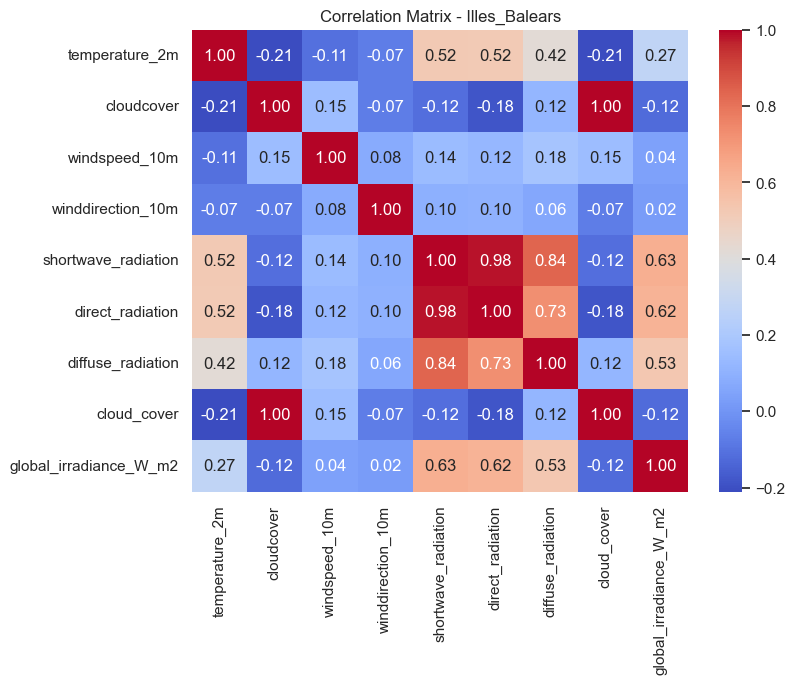

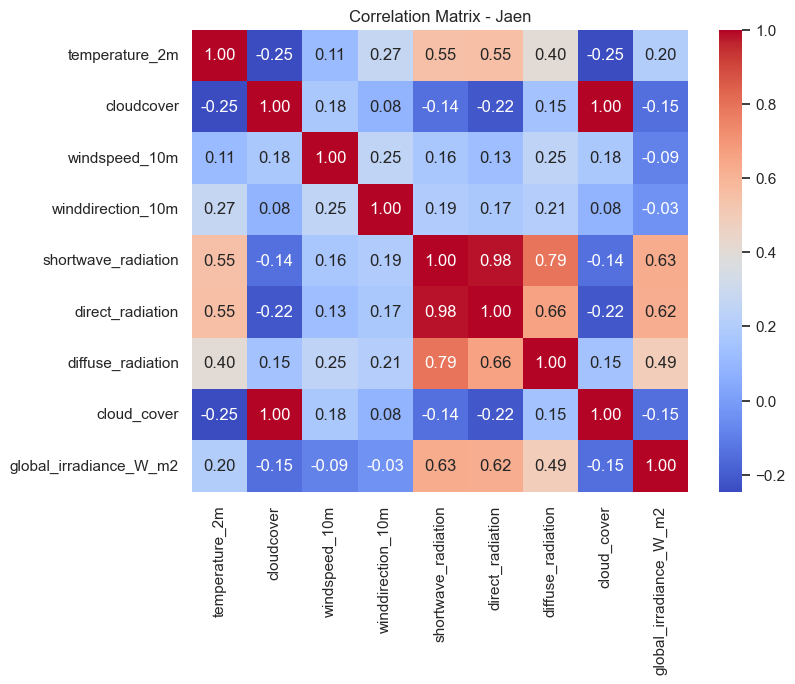

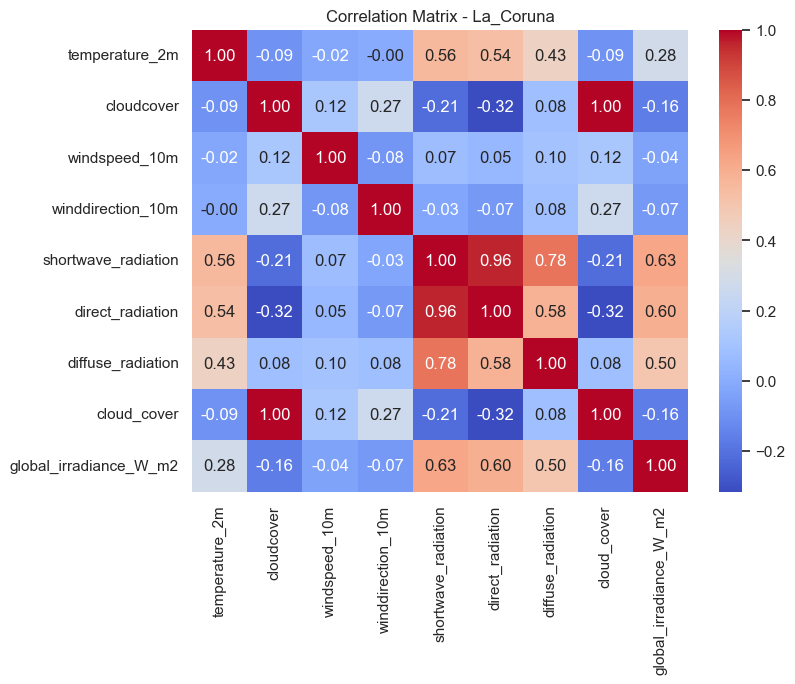

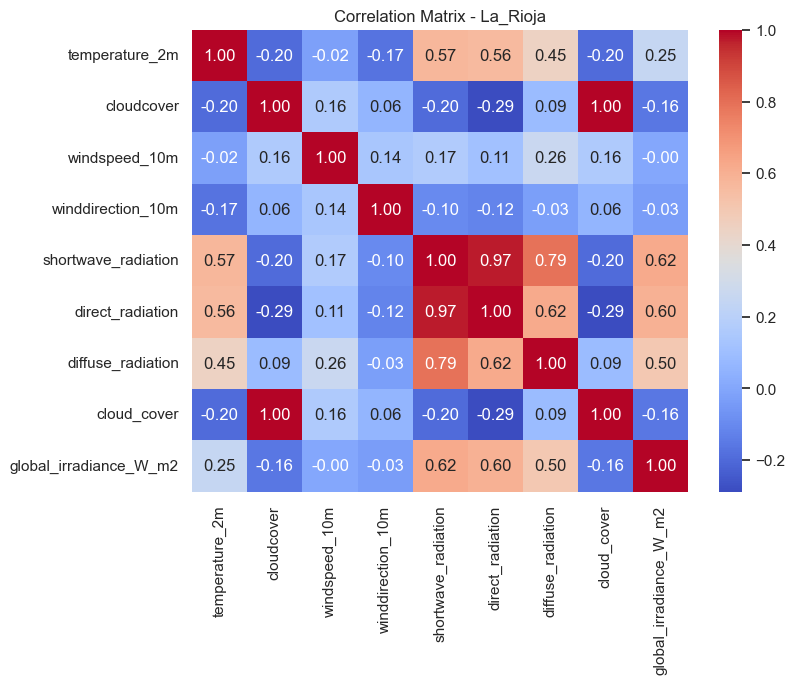

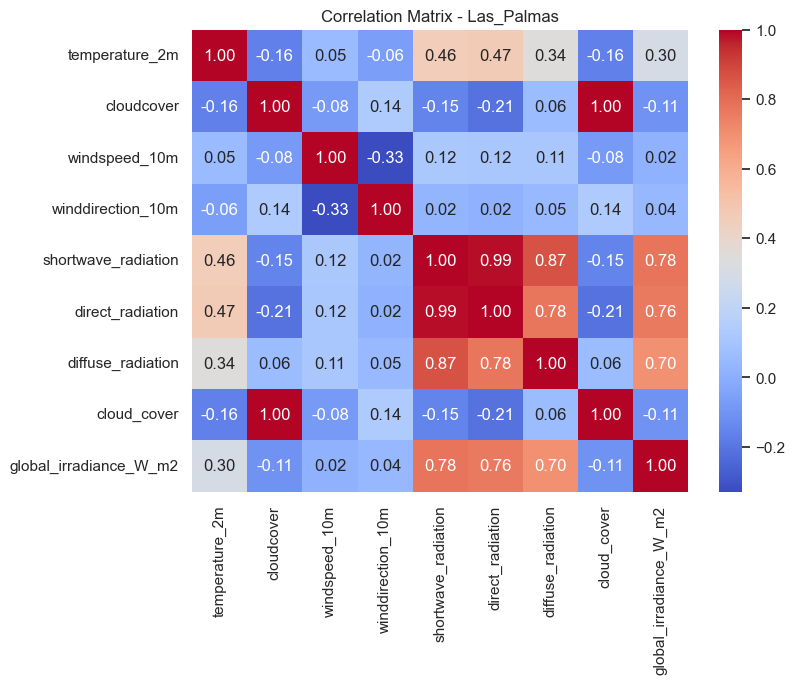

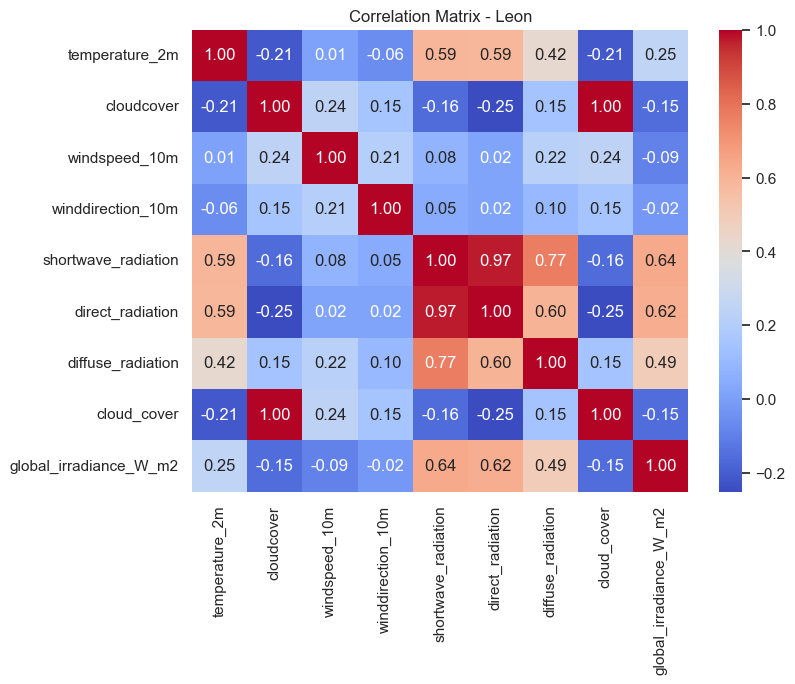

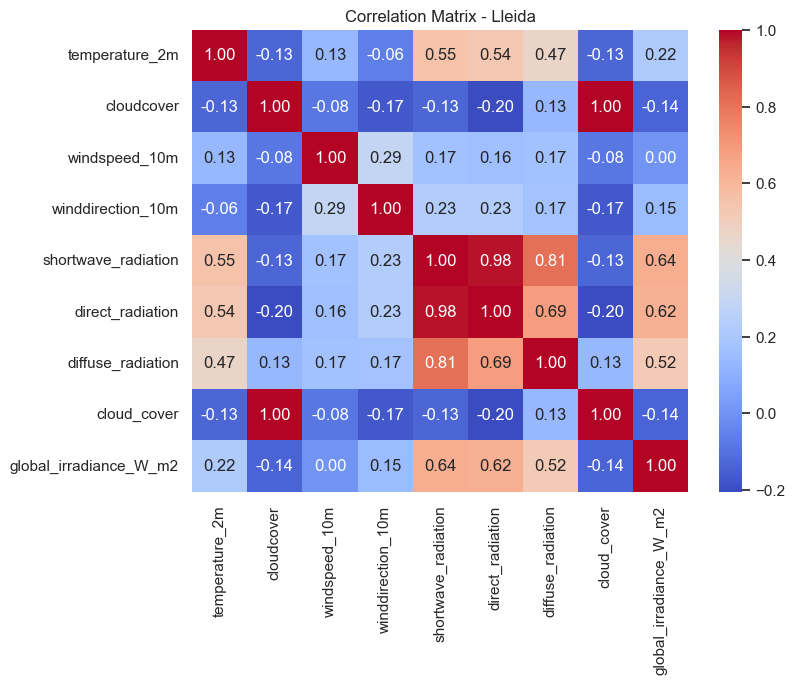

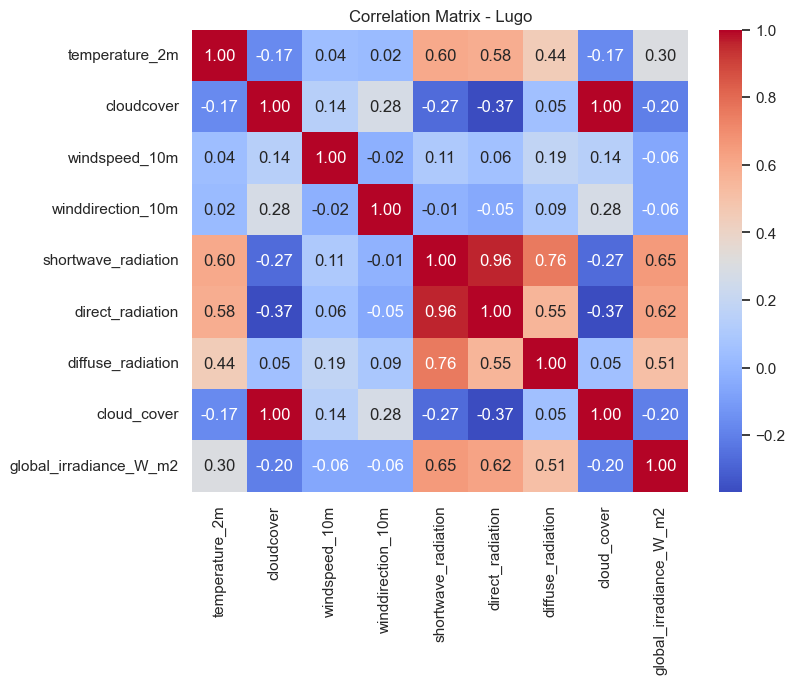

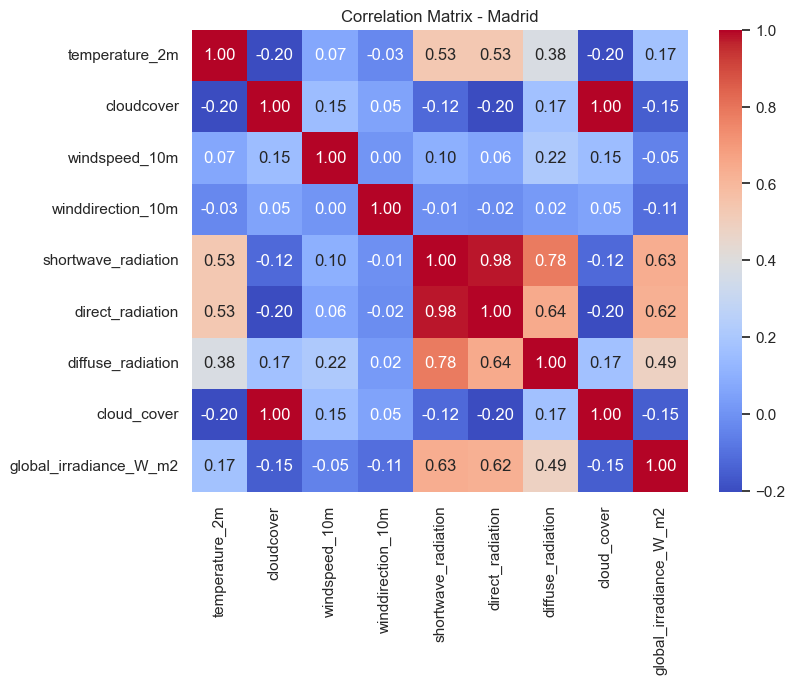

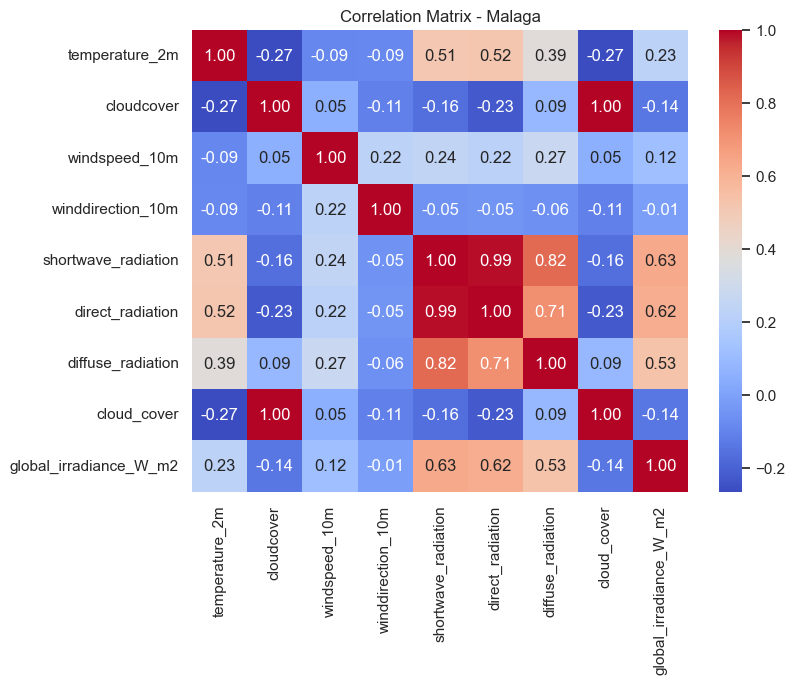

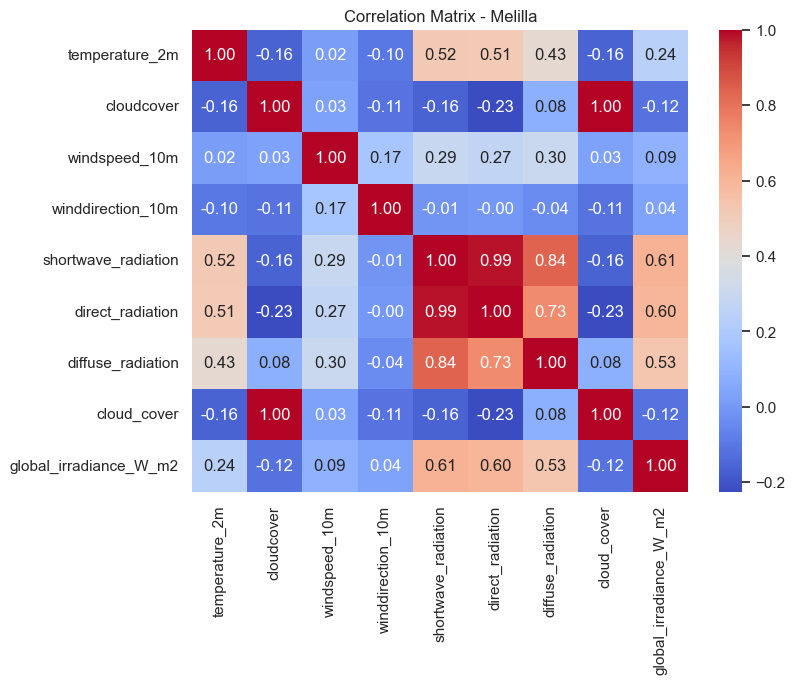

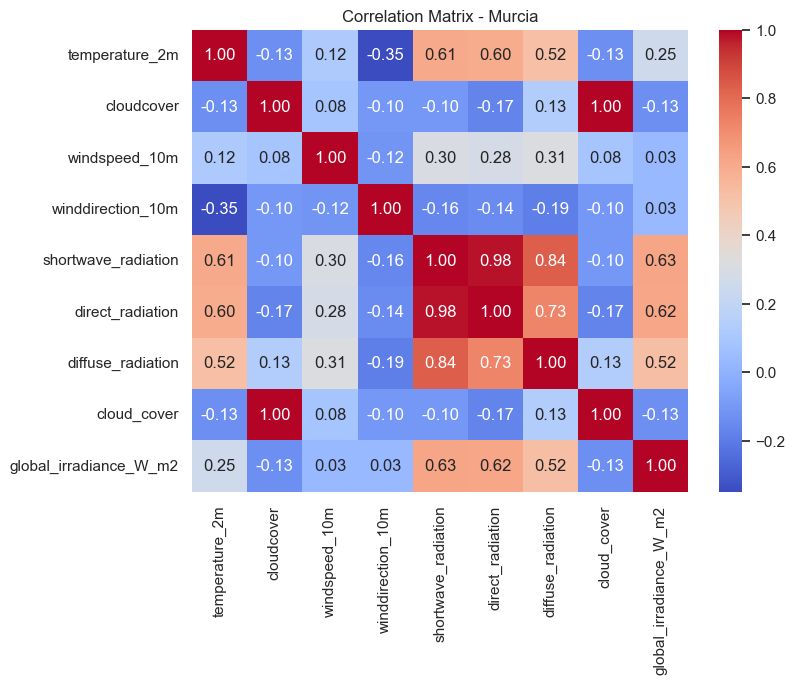

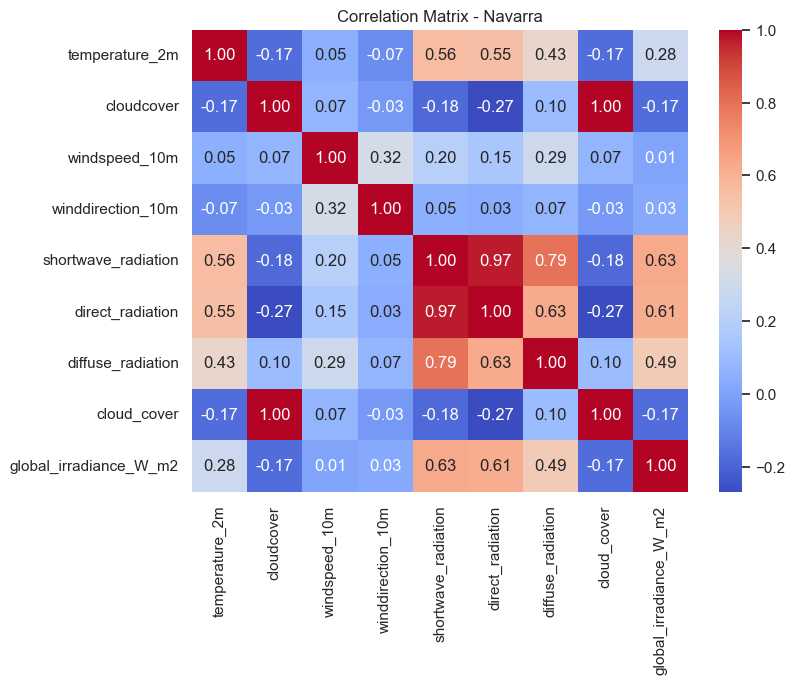

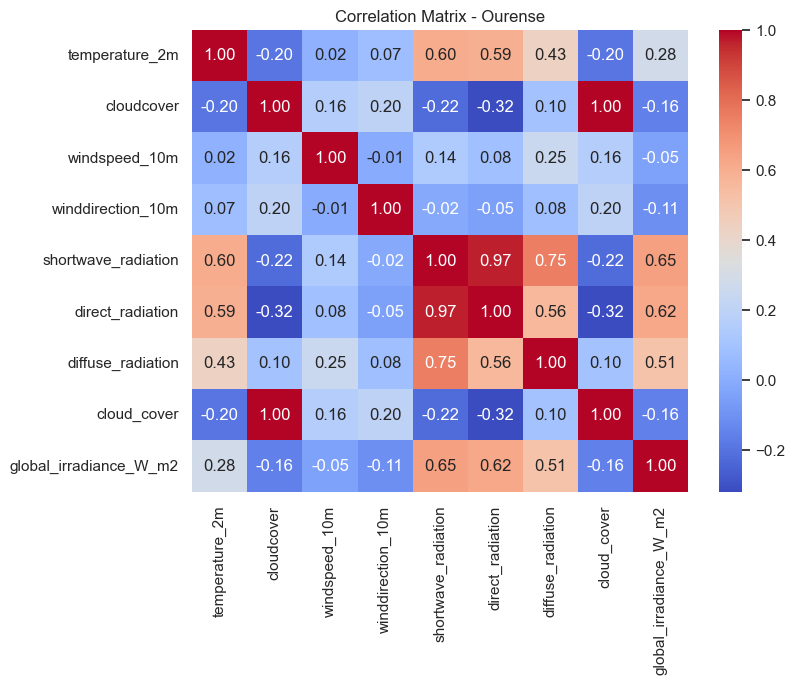

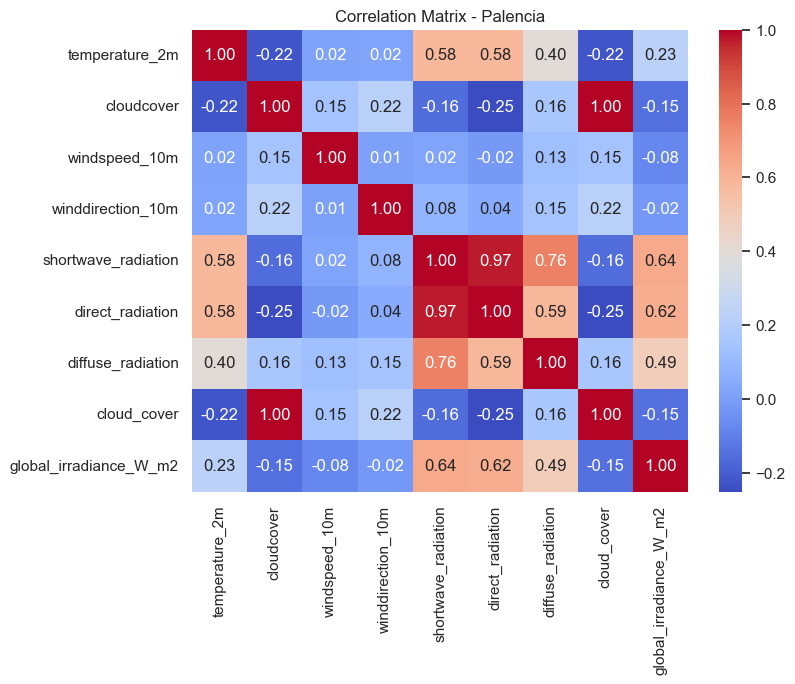

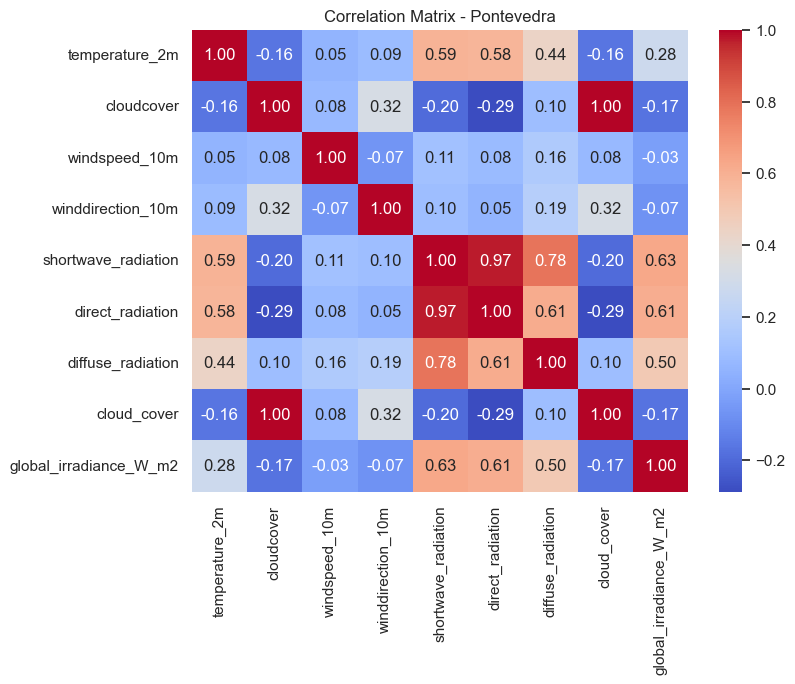

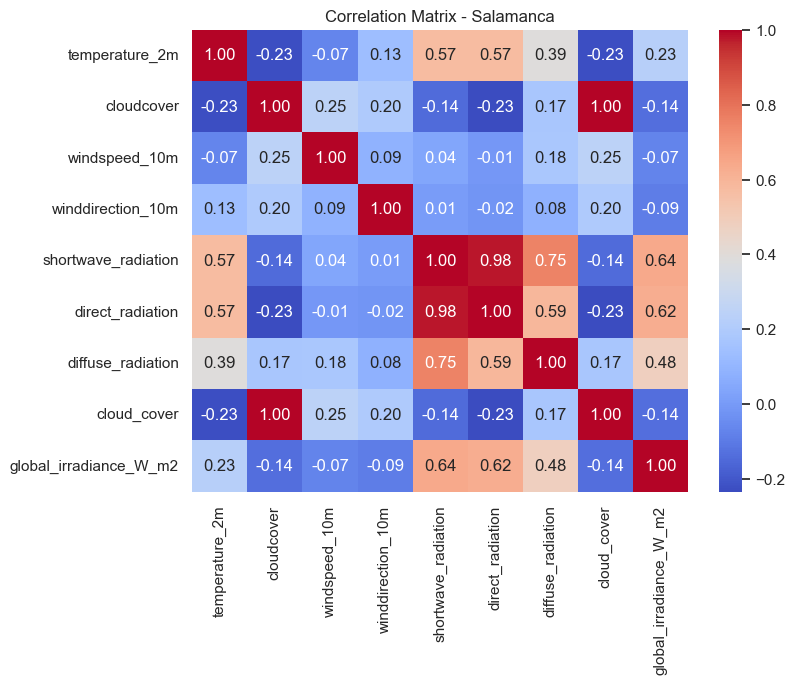

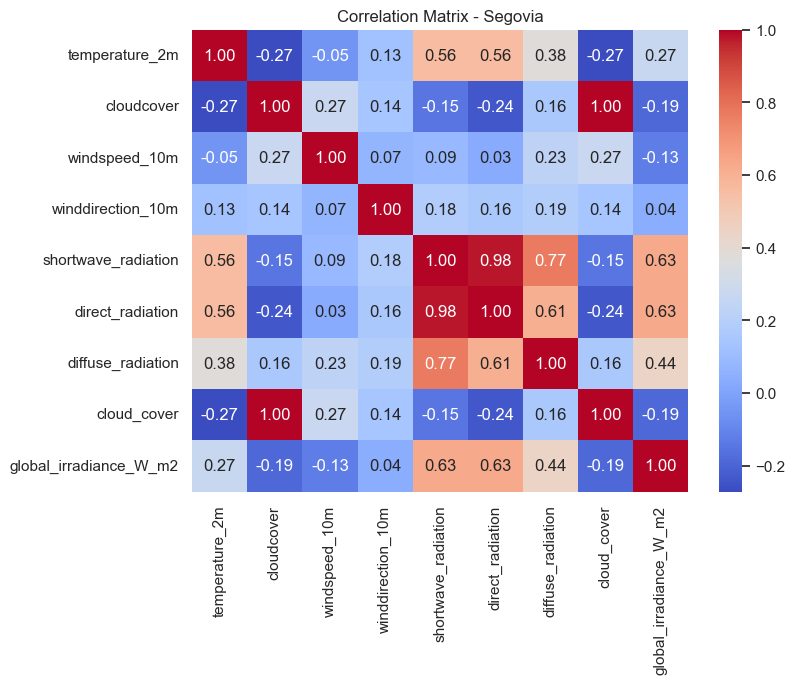

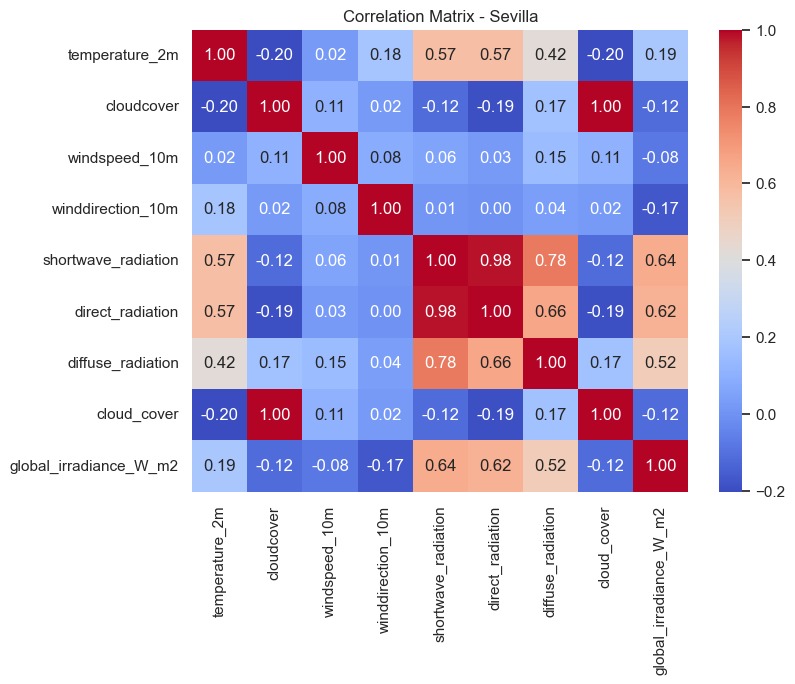

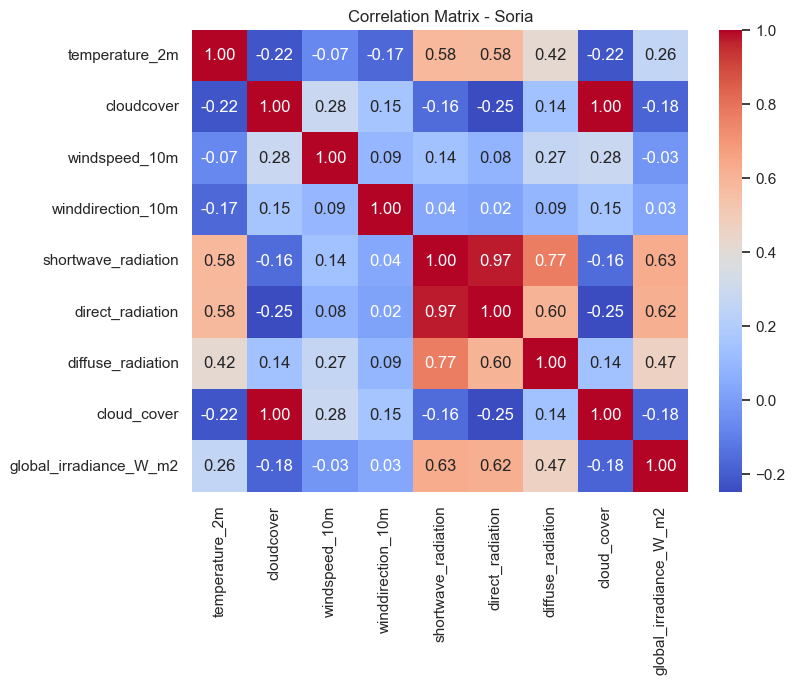

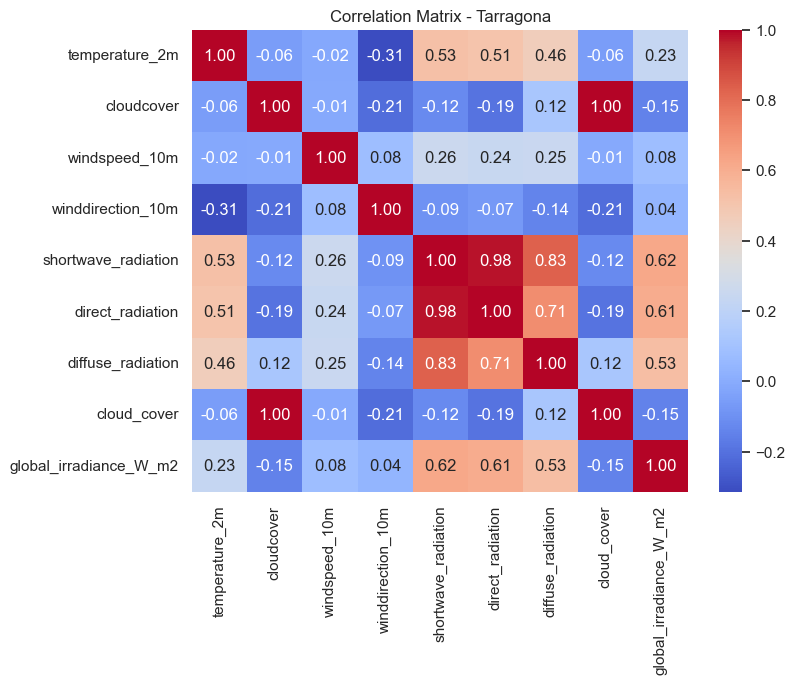

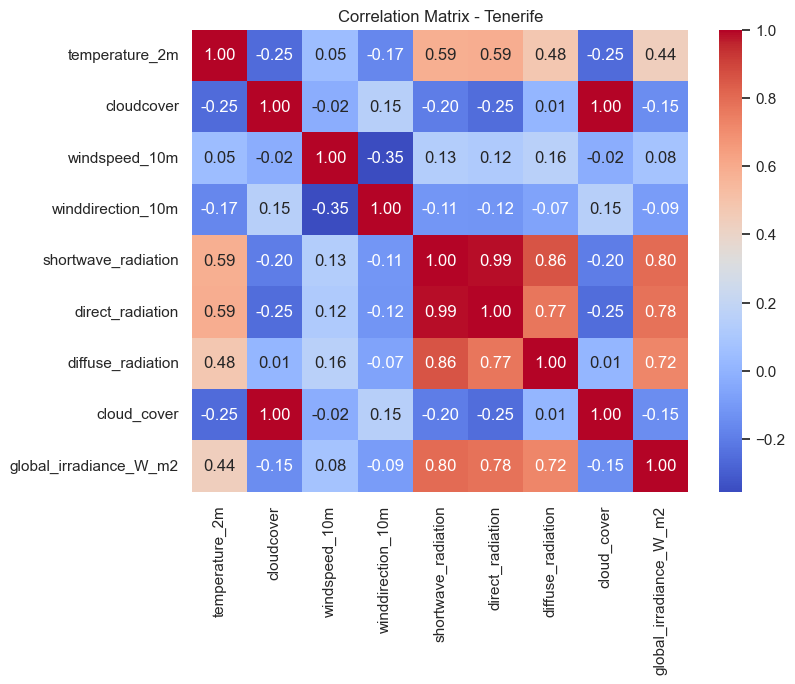

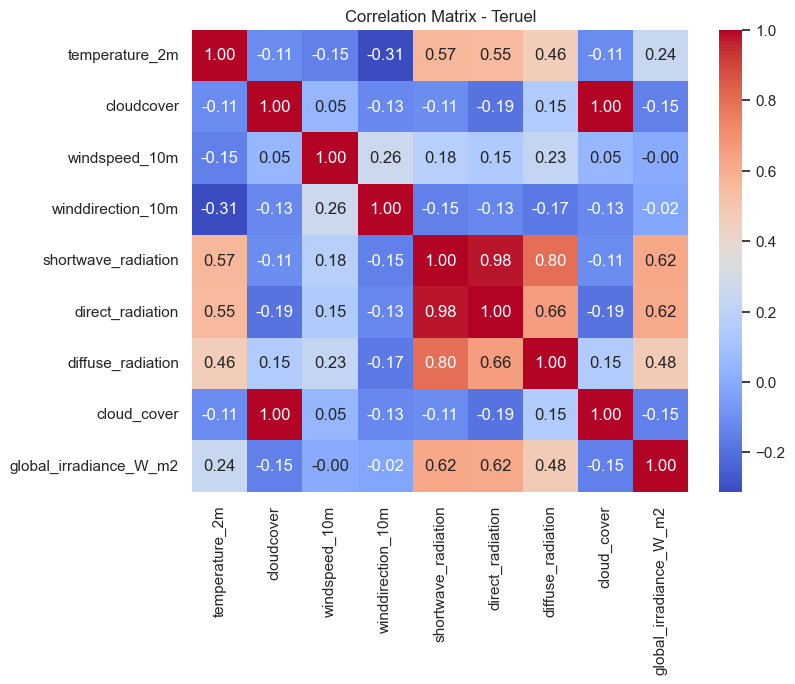

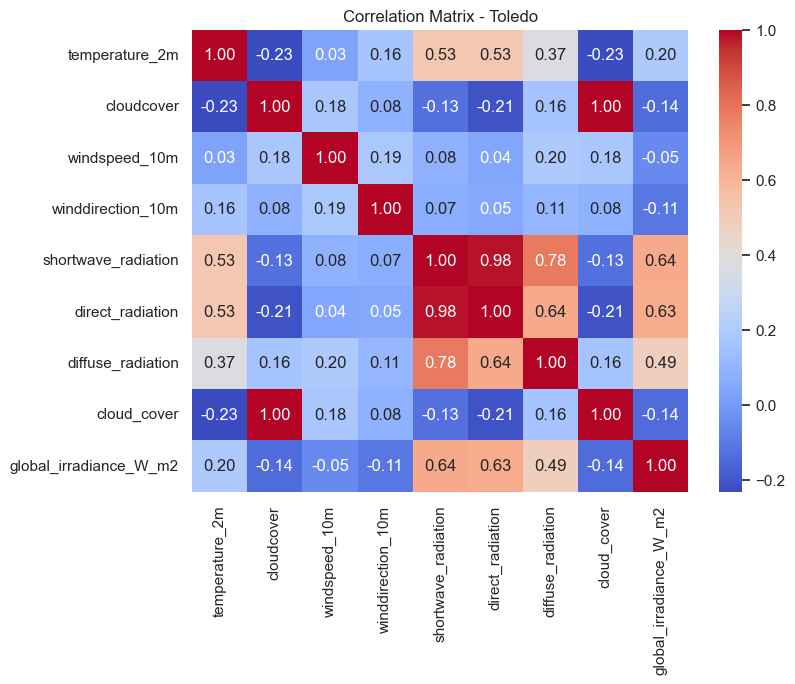

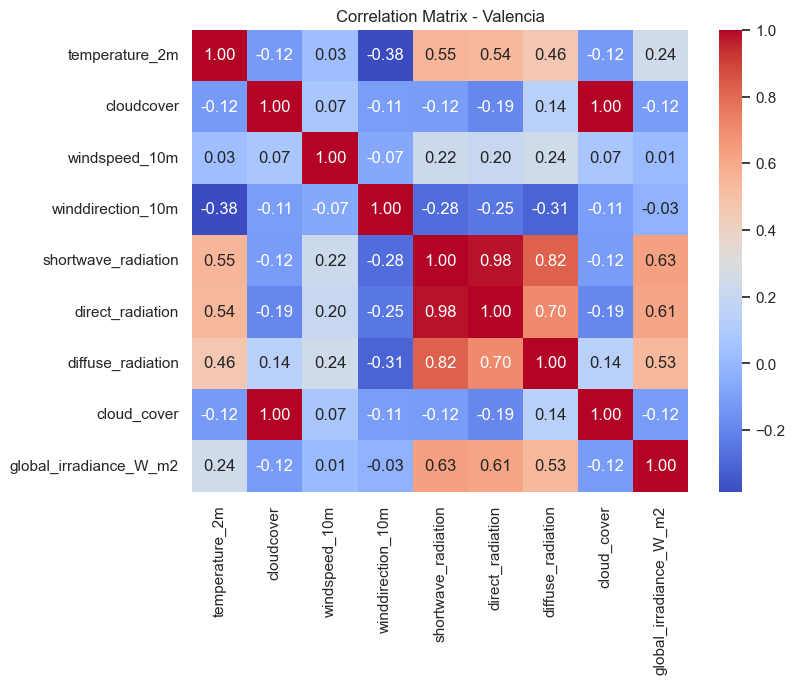

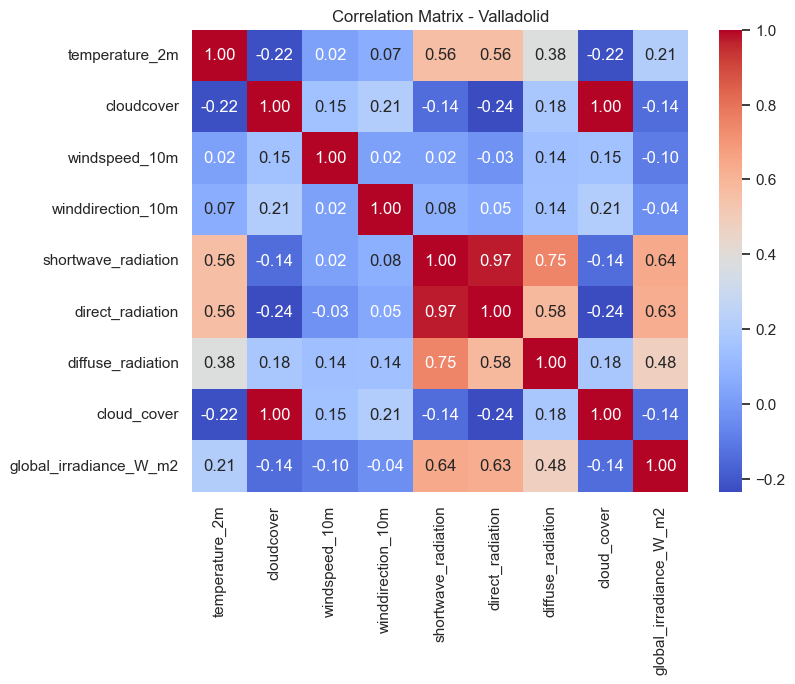

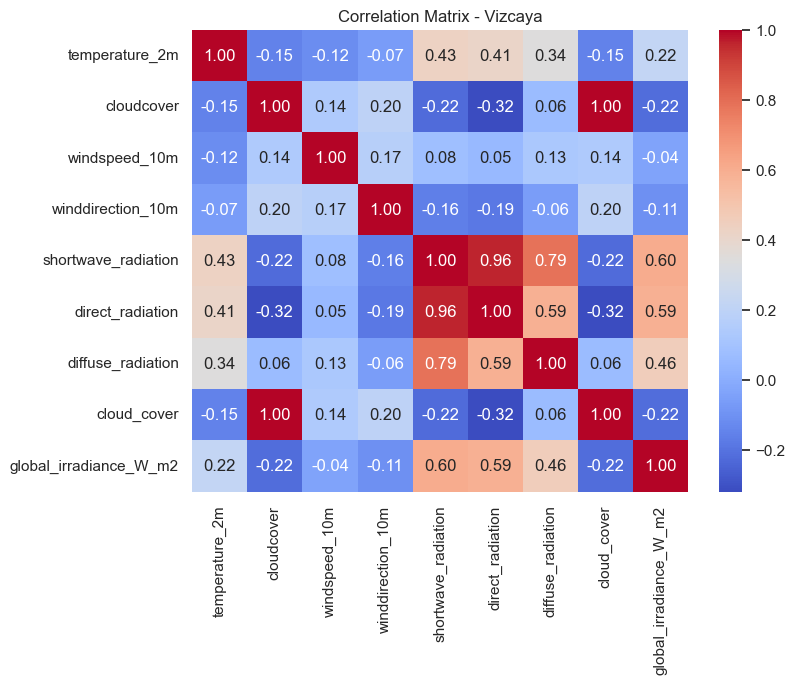

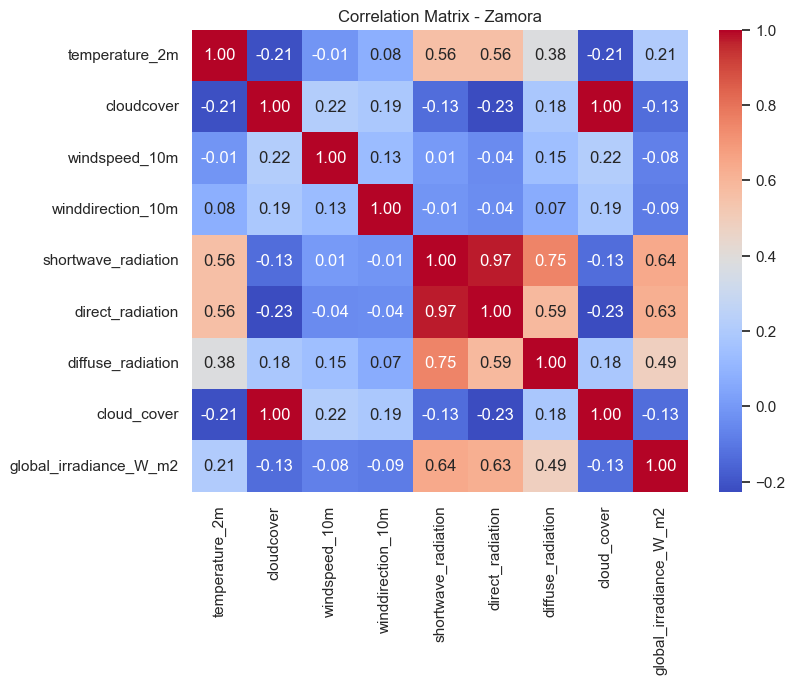

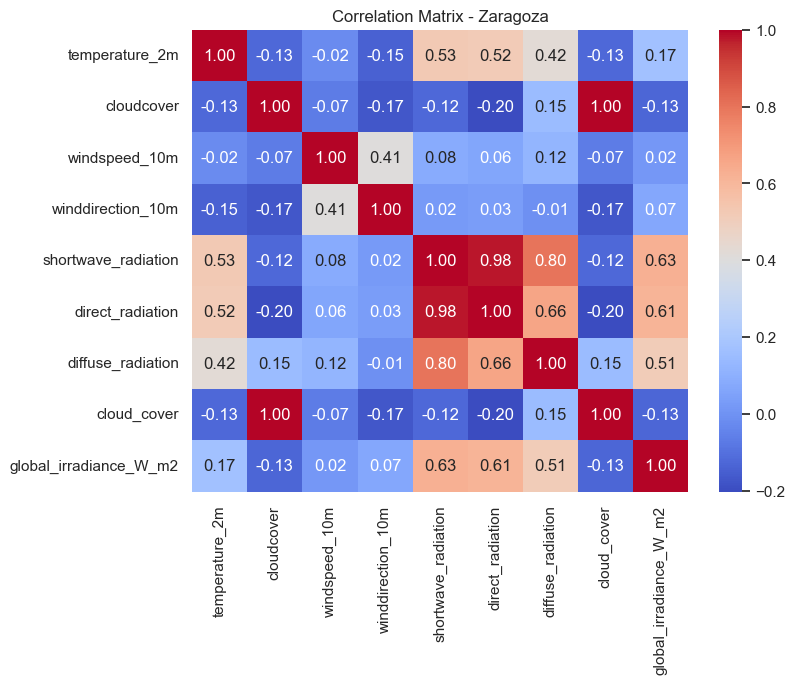

In [5]:
features = [
    'temperature_2m',
    'cloudcover',
    'windspeed_10m',
    'winddirection_10m',
    'shortwave_radiation',
    'direct_radiation',
    'diffuse_radiation',
    'cloud_cover'
]

cities = df['city'].unique()

for city in cities:
    df_city = df[df['city'] == city]
    corr = df_city[features + [target]].corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix - {city.title()}")
    plt.show()


## 5. Seasonality per city (Month & Hour)

C:\Users\mmarc\AppData\Local\Temp\ipykernel_3096\701923462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['month'] = df_nonzero['time'].dt.month


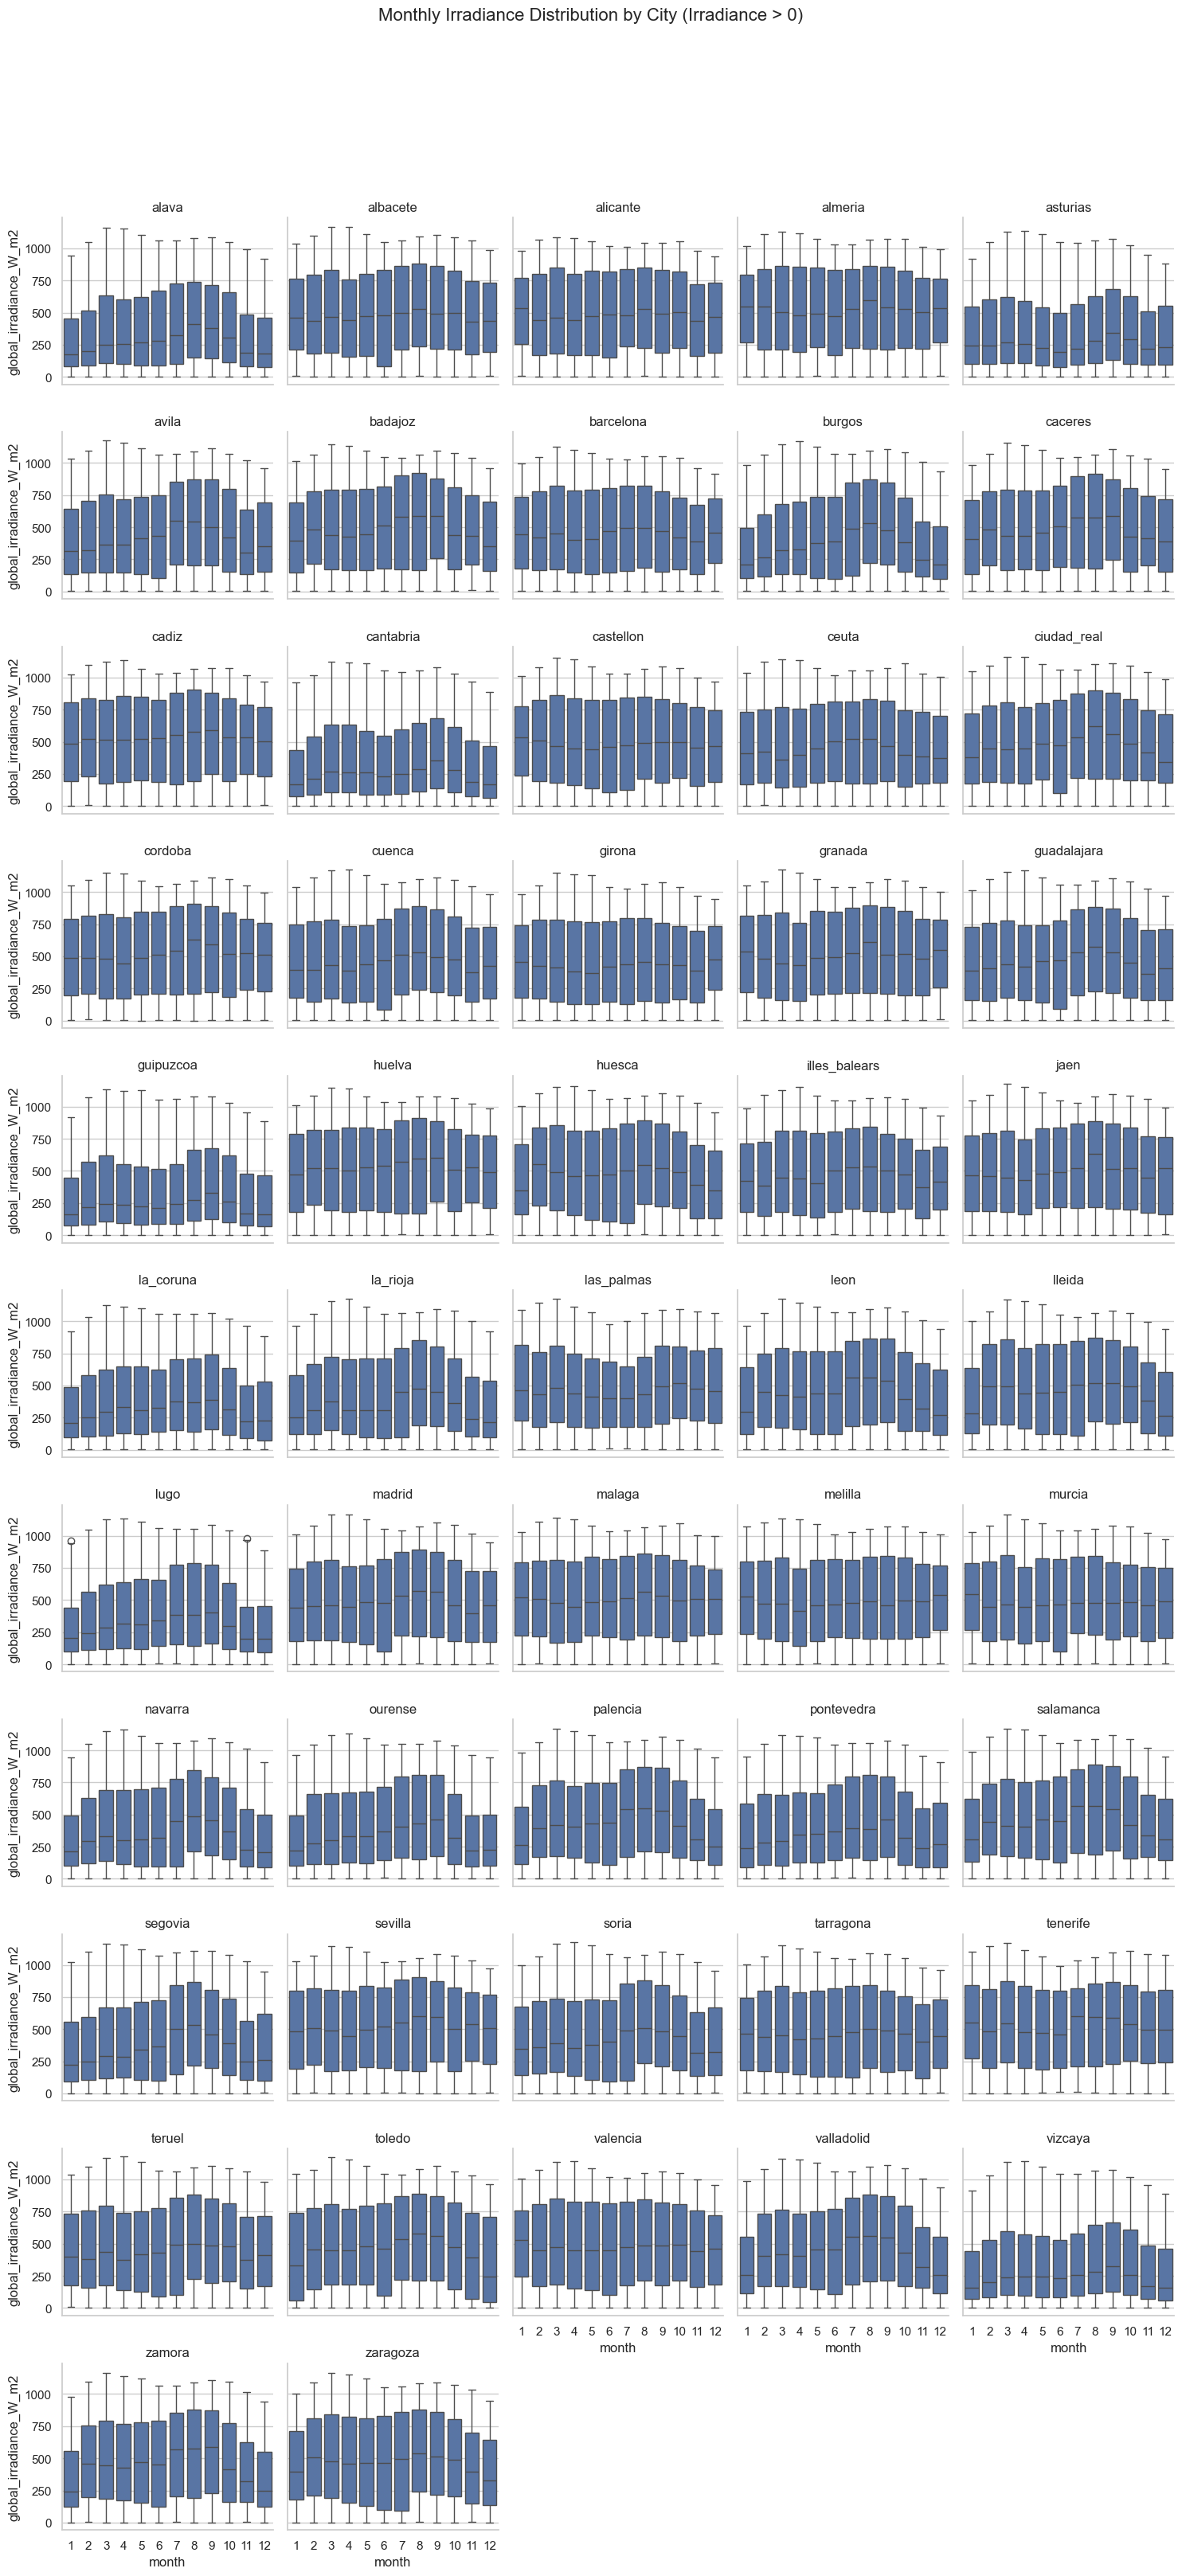

In [6]:
# Monthly seasonality:
df_nonzero['month'] = df_nonzero['time'].dt.month

g = sns.FacetGrid(df_nonzero, col="city", col_wrap=5, sharex=True, sharey=True)
g.map_dataframe(sns.boxplot, x="month", y=target)

for ax, title in zip(g.axes.flatten(), df_nonzero['city'].unique()):
    ax.set_title(title)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Irradiance Distribution by City (Irradiance > 0)", fontsize=16)
plt.show()


C:\Users\mmarc\AppData\Local\Temp\ipykernel_3096\2039783376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzero['hour'] = df_nonzero['time'].dt.hour


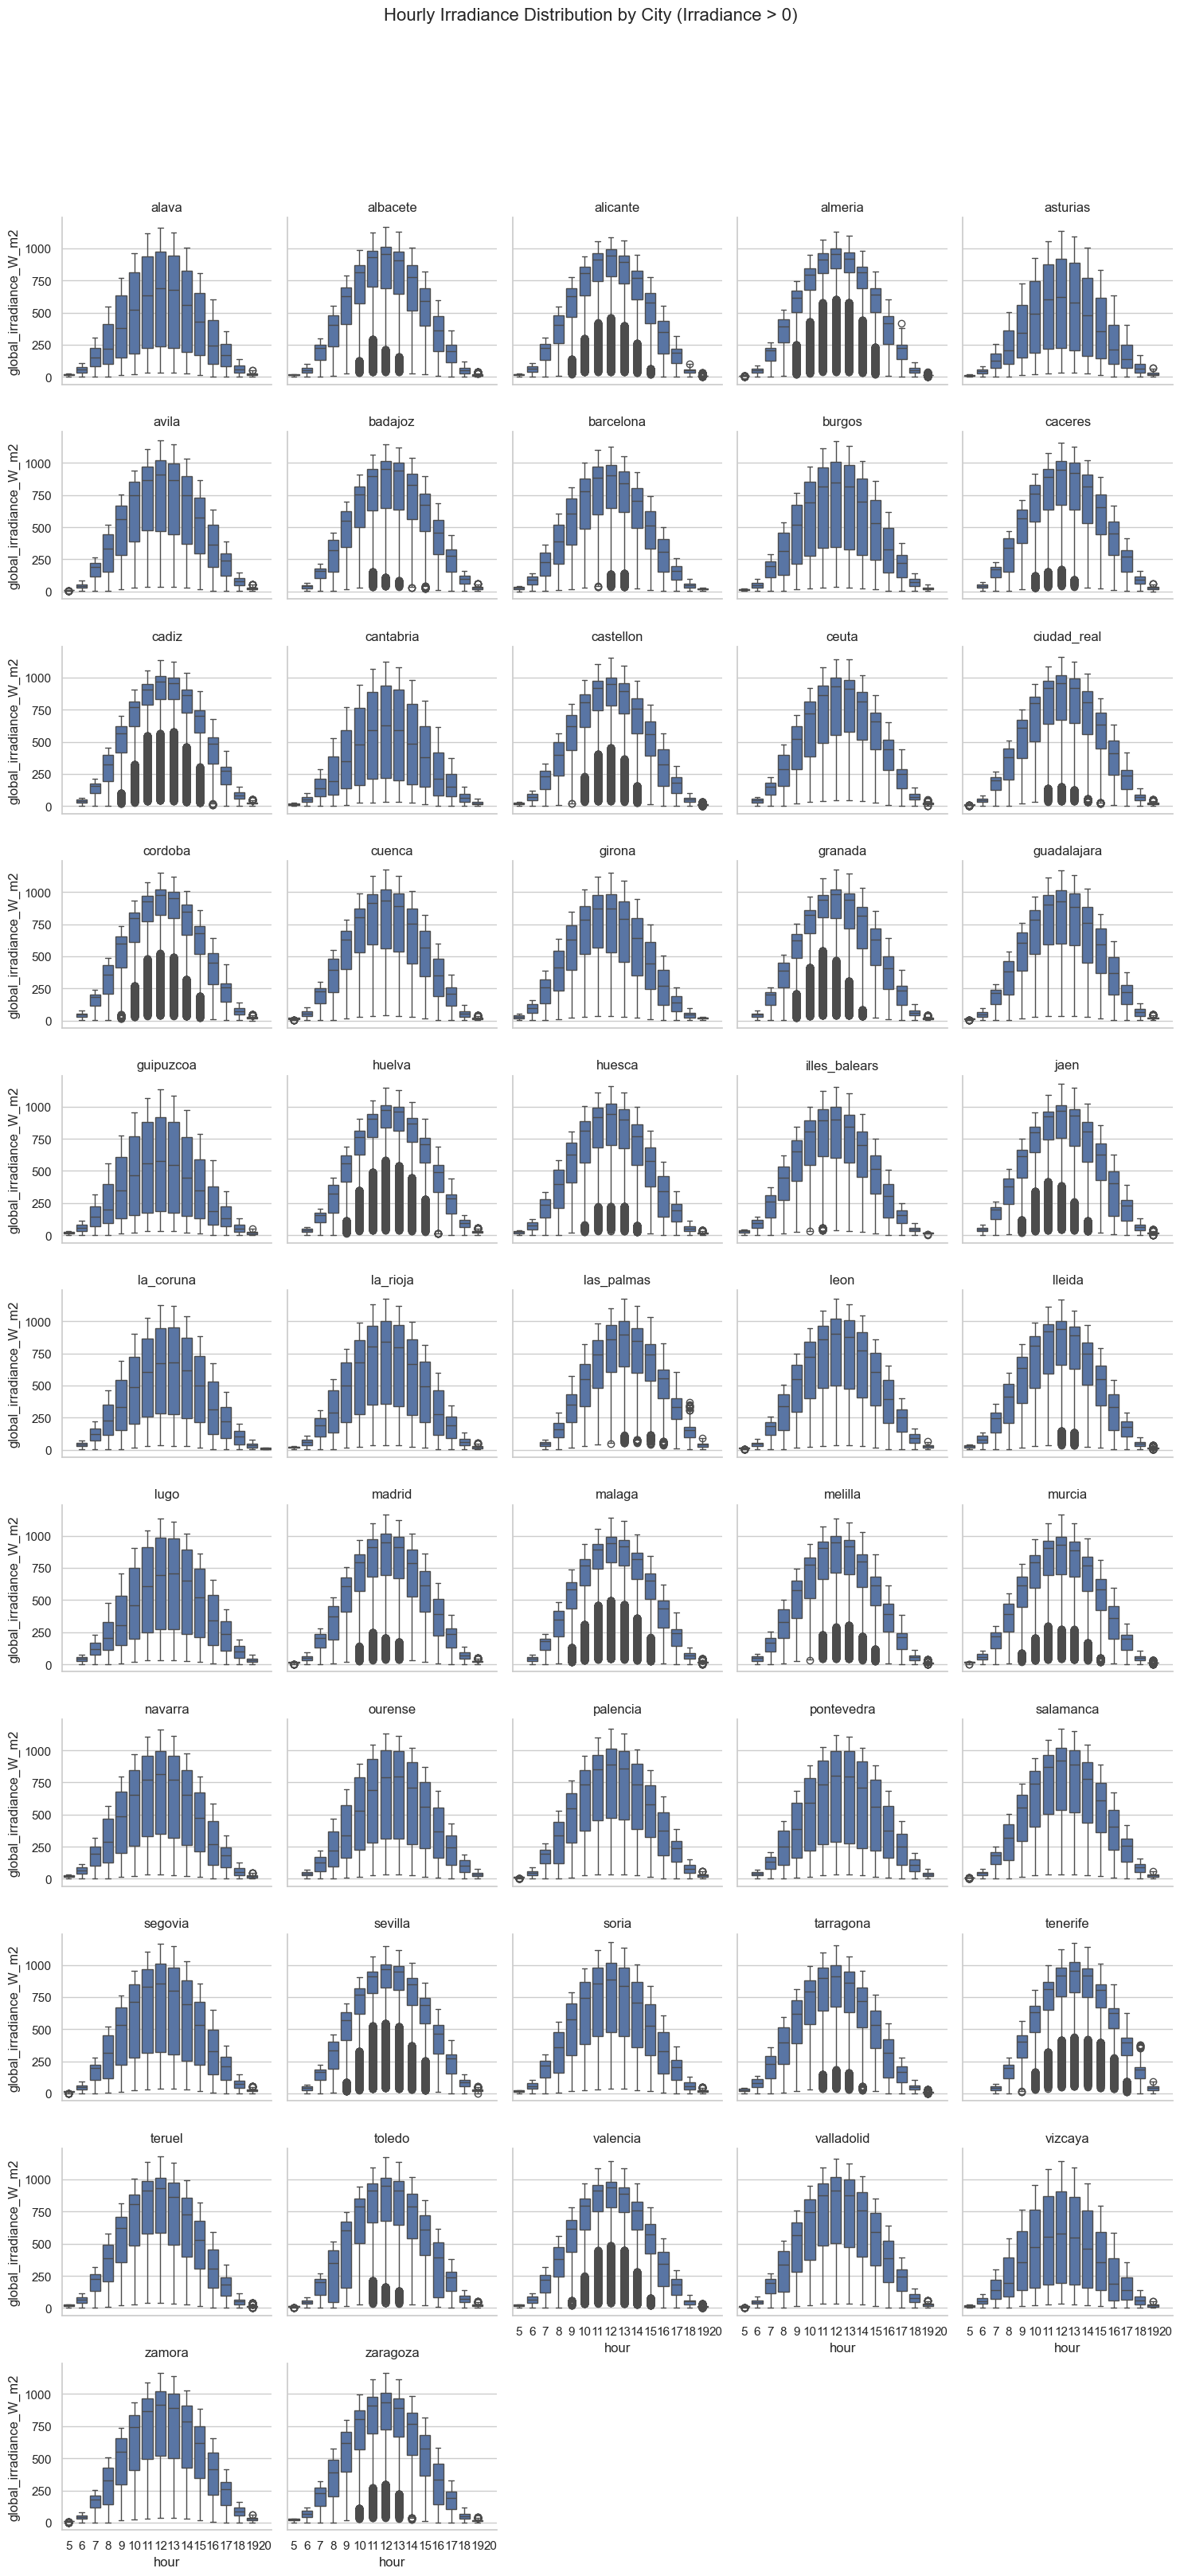

In [7]:
# Hourly seasonality:
df_nonzero['hour'] = df_nonzero['time'].dt.hour

g = sns.FacetGrid(df_nonzero, col="city", col_wrap=5, sharex=True, sharey=True)
g.map_dataframe(sns.boxplot, x="hour", y=target)

for ax, title in zip(g.axes.flatten(), df_nonzero['city'].unique()):
    ax.set_title(title)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Hourly Irradiance Distribution by City (Irradiance > 0)", fontsize=16)
plt.show()
